<a href="https://colab.research.google.com/github/arhazza/Clustering-MutualFundUsers/blob/main/%5BW6W7W8_AUG22%5D_Syifa_Azzahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief
[W6W7W8_AUG22]_Syifa_Azzahra



1.   Users Dataset
https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing 


2.   Daily User Balance Dataset
https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing






# Libraries

In [ ]:
import pandas as pd                        #to perform advanced data analysis, import data quickly
import numpy as np                         #to perform arge mahematical operations and statistical operation
from datetime import datetime              #to perform manipulating dates and times

# limitation to show columns and rows
pd.set_option('display.max_columns', None) # This will show all columns in the current DataFrame.
pd.set_option('display.min_rows', 100)     # This will show 100 rows in the current DataFrame.

# Data Visualisation
import matplotlib.pyplot as plt            #to perform simple interactive visualization
import seaborn as sns                      #to perform visualization with many color palettes, beatifull style and many statistical plots

# Clustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to scalling different attribute
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Correlatiom
from scipy import stats

import math 
from statsmodels.stats.weightstats import ztest
from scipy.stats import chisquare

# Regression
from sklearn.linear_model import LinearRegression     # linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression   # logistic regression

# [MILESTONE 1]

# 1. Cleaning Dataset

## 1.1. Users Dataset

### 1.1.1. Import Dataset

In [ ]:
# Import users dataset from csv file
users_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing'

users = 'https://drive.google.com/uc?id='+ users_url.split('/')[-2]

users_df = pd.read_csv(users)
users_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis


In [ ]:
users_df_copy = users_df.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
users_df_copy.info()            #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


### 1.1.2. Handling Missing Value

In [ ]:
# Check number of NaN Value in each column
users_df_copy.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [ ]:
# check if there is other value besides 'used referral' and NaN
users_df_copy['referral_code_used'].unique()

array([nan, 'used referral'], dtype=object)

In [ ]:
# NaN value in column referral_code_used will be fill with 'not used'
# because If user enter referral code during registration, the value is "used referral"; else will be Null valued
users_df_copy['referral_code_used'].fillna('not used', inplace = True)
users_df_copy

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis


In [ ]:
users_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


### 1.1.3. Handling Typos

In [ ]:
# check unique value in user_id column
# users_df_copy['user_id'].value_counts()   --> we can use this or
users_df_copy['user_id'].duplicated().sum()

0

In [ ]:
# check unique value in user_gender column
users_df_copy['user_gender'].unique().tolist()

['Female', 'Male']

In [ ]:
# check unique value in user_occupation column
users_df_copy['user_occupation'].unique().tolist()

['Swasta',
 'Others',
 'IRT',
 'PNS',
 'Pengusaha',
 'Pensiunan',
 'TNI/Polisi',
 'Guru',
 'Pelajar']

In [ ]:
# check unique value in user_income_range column
users_df_copy['user_income_range'].unique().tolist()

['> Rp 500 Juta - 1 Miliar',
 '> Rp 50 Juta - 100 Juta',
 'Rp 10 Juta - 50 Juta',
 '< 10 Juta',
 '> Rp 100 Juta - 500 Juta',
 '> Rp 1 Miliar']

In [ ]:
# check unique value in referral_code_used column
users_df_copy['referral_code_used'].unique().tolist()

['not used', 'used referral']

In [ ]:
# check unique value in user_income_source column
users_df_copy['user_income_source'].unique().tolist()

['Gaji',
 'Keuntungan Bisnis',
 'Lainnya',
 'Dari Orang Tua / Anak',
 'Undian',
 'Tabungan',
 'Warisan',
 'Hasil Investasi',
 'Dari Suami / istri',
 'Bunga Simpanan']

there are no typos value in users dataset

### 1.1.4. Duplicates Data

In [ ]:
# check number of duplicates values
users_df_copy.duplicated().sum()

0

there are no duplicates data in users dataset

### 1.1.5. Handling Outliers

In [ ]:
users_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


we will check outliers in user_age column and user_income_range

In [ ]:
# check outliers in user_income_range column
users_df_copy['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

should we removed user with income range > Rp 1 Miliar?

we shouldn't remove it, because it is a natural part of the population

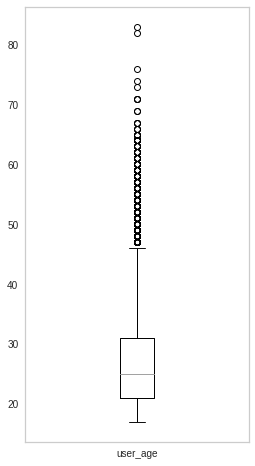

In [ ]:
# check outliers in user_age column use boxplot
users_df_copy.boxplot(column=['user_age'], fontsize=10, rot=0, grid=False, figsize=(4,8))

In [ ]:
# Find Q1, Q3, IQR
Q1 = users_df_copy['user_age'].quantile(0.25)
Q3 = users_df_copy['user_age'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 21.0

Q3:
 31.0

IQR:
 10.0

Min:
 6.0

Max:
 46.0


In [ ]:
# Find max and min value
min_age = np.min(users_df_copy['user_age'])
max_age = np.max(users_df_copy['user_age'])

print('min value = ', min_age)
print('max value = ', max_age)

min value =  17
max value =  83


In [ ]:
# display data including outliers
low_out_age = []
high_out_age = []

for i in users_df_copy['user_age']:
    if (i < boxplot_min):
        low_out_age.append(i)
    if (i > boxplot_max):
        high_out_age.append(i)

print('Low outlier : ', low_out_age)
print('High outlier : ', high_out_age)

Low outlier :  []
High outlier :  [51, 55, 50, 53, 47, 53, 56, 59, 57, 50, 47, 58, 54, 53, 57, 50, 47, 51, 57, 51, 53, 47, 57, 53, 47, 51, 55, 52, 54, 53, 59, 47, 47, 58, 52, 50, 64, 60, 73, 50, 61, 54, 53, 56, 53, 52, 50, 54, 47, 47, 61, 61, 53, 47, 74, 51, 50, 47, 47, 55, 51, 56, 56, 54, 51, 54, 52, 50, 54, 50, 54, 59, 53, 54, 50, 56, 65, 50, 51, 51, 47, 56, 67, 54, 59, 51, 54, 54, 47, 47, 47, 53, 52, 53, 47, 50, 50, 53, 51, 51, 56, 51, 54, 55, 58, 51, 51, 59, 60, 52, 51, 50, 47, 55, 62, 58, 51, 71, 55, 50, 51, 54, 55, 51, 52, 54, 65, 61, 52, 54, 53, 52, 53, 47, 50, 53, 57, 47, 47, 52, 57, 50, 52, 57, 51, 47, 60, 47, 53, 47, 51, 61, 47, 50, 55, 55, 60, 50, 51, 47, 60, 56, 50, 52, 56, 54, 57, 51, 52, 47, 50, 63, 53, 56, 47, 62, 55, 52, 54, 56, 63, 51, 50, 54, 58, 51, 53, 53, 63, 61, 51, 56, 50, 53, 53, 53, 60, 57, 69, 56, 55, 51, 52, 53, 51, 53, 54, 52, 63, 51, 47, 47, 51, 52, 52, 47, 56, 50, 52, 56, 54, 55, 51, 55, 52, 71, 56, 55, 60, 50, 52, 47, 56, 52, 54, 51, 55, 51, 59, 50, 47, 4

In [ ]:
# Filter value that <Bottom fence and >Upper fence
low_out_age = users_df_copy['user_age'] < boxplot_min
high_out_age = users_df_copy['user_age'] > boxplot_max

# display data including outliers in users dataset
age_outlier = users_df_copy.loc[(low_out_age | high_out_age)]

age_outlier

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis


should we removed outliers in column user_age?

we shouldn't remove it, because it is a natural part of the population

### 1.1.6. Convert Data Types


In [ ]:
users_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB




1.   convert registration_import_datetime data type from object to datetime
2.   Item daftar



In [ ]:
# convert registration_import_datetime data type from object to datetime
users_df_copy['registration_import_datetime'] = pd.to_datetime(users_df_copy['registration_import_datetime'])

# check data information
users_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


In [ ]:
users_df_copy

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis


### Clean Users Dataset

In [ ]:
users_df_clean = users_df_copy.copy()
users_df_clean

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis


## 1.2. Daily User Balance Dataset

### 1.2.1. Import Dataset

In [ ]:
# Import daily user balance dataset from csv file
dub_url = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing'

dub = 'https://drive.google.com/uc?id='+ dub_url.split('/')[-2]

dub_df = pd.read_csv(dub)
dub_df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9995062.0,10000000.0,0.0
6,50701,2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9964287.0,10000000.0,0.0
7,50701,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9754798.0,10000000.0,0.0
8,50701,2021-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9660079.0,10000000.0,0.0
9,50701,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9758339.0,10000000.0,0.0


In [ ]:
dub_df_copy = dub_df.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
dub_df_copy.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

### 1.2.2. Handling Missing Value

In [ ]:
# Check number of NaN Value in each column
dub_df_copy.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
# NaN value in column Saham_AUM - Campuran_transaction_amount will be fill with '0'
# because If there is no transaction, the value should be '0' or NaN

dub_df_copy.fillna(0, inplace = True)
dub_df_copy

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9995062.0,10000000.0,0.0
6,50701,2021-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9964287.0,10000000.0,0.0
7,50701,2021-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9754798.0,10000000.0,0.0
8,50701,2021-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9660079.0,10000000.0,0.0
9,50701,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9758339.0,10000000.0,0.0


In [ ]:
dub_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            158811 non-null  float64
 3   Saham_invested_amount                158811 non-null  float64
 4   Saham_transaction_amount             158811 non-null  float64
 5   Pasar_Uang_AUM                       158811 non-null  float64
 6   Pasar_Uang_invested_amount           158811 non-null  float64
 7   Pasar_Uang_transaction_amount        158811 non-null  float64
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  158811 non-null  float64
 11  Campuran_AUM 

### 1.2.3. Duplicates Data

In [ ]:
# check number of duplicates values
dub_df_copy.duplicated().sum() 

0

there are no duplicates data in Daily User Balance dataset

### 1.2.5. Convert Data Types

1.   column date datatype should be datetime

In [ ]:
# convert date column data type from object to datetime
dub_df_copy['date'] = pd.to_datetime(dub_df_copy['date'])

# check data information
dub_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

# 2. Transform Dataset

create user-level information 


1.   end-of-period AUM
2.   end-of-period invested amount
3.   total buy transaction
4.   total sell transaction
5.   total net transaction
6.   profit/loss






In [ ]:
dub_df_clean = dub_df_copy.copy() #make a copy dataframe
dub_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

In [ ]:
# create dataset that include end-of-period AUM and invested amount
# where date is 30-09-2021
AUM_invested_amount_df = dub_df_clean.copy()

AUM_invested_amount_df = AUM_invested_amount_df.loc[AUM_invested_amount_df['date'] == '2021-09-30']

AUM_invested_amount_df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0
74,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0
99,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0
174,67251,2021-09-30,584731.0,570000.0,0.0,110195.0,110000.0,0.0,419238.0,420000.0,0.0,0.0,0.0,0.0
188,70568,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,0.0,0.0,0.0,0.0
225,71229,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,72676,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,0.0,0.0,0.0,0.0


In [ ]:
AUM_invested_amount_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 23 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              8277 non-null   int64         
 1   date                                 8277 non-null   datetime64[ns]
 2   Saham_AUM                            8277 non-null   float64       
 3   Saham_invested_amount                8277 non-null   float64       
 4   Saham_transaction_amount             8277 non-null   float64       
 5   Pasar_Uang_AUM                       8277 non-null   float64       
 6   Pasar_Uang_invested_amount           8277 non-null   float64       
 7   Pasar_Uang_transaction_amount        8277 non-null   float64       
 8   Pendapatan_Tetap_AUM                 8277 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     8277 non-null   float64       
 10  Pendapata

In [ ]:
# drop some columns, so the dataset only has end of period AUM and end of period invested amount
# create a list of the columns you want to drop
drop_column_transaction = ['date','Saham_transaction_amount',
                          'Pasar_Uang_transaction_amount',
                          'Pendapatan_Tetap_transaction_amount',
                          'Campuran_transaction_amount']

AUM_invested_amount_df.drop(drop_column_transaction, axis=1, inplace=True)

AUM_invested_amount_df = AUM_invested_amount_df.set_index('user_id')

AUM_invested_amount_df 

,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
user_id,,,,,,,,
50701,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0
50961,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,0.0,0.0
53759,73179.0,70000.0,10027.0,10000.0,20109.0,20000.0,0.0,0.0
54759,0.0,0.0,12049049.0,12000000.0,0.0,0.0,0.0,0.0
61414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66145,249327.0,240000.0,29992.0,30000.0,129748.0,130000.0,0.0,0.0
67251,584731.0,570000.0,110195.0,110000.0,419238.0,420000.0,0.0,0.0
70568,61880.0,60000.0,10024.0,10000.0,129828.0,130000.0,0.0,0.0
71229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create dataset that include end-of-period AUM and invested amount
#AUM_invested_amount_df = dub_df_clean.groupby(['user_id']).agg({'Saham_AUM':'last','Saham_invested_amount':'last',
                                                                #'Pasar_Uang_AUM':'last','Pasar_Uang_invested_amount':'last',
                                                                #'Pendapatan_Tetap_AUM':'last','Pendapatan_Tetap_invested_amount':'last',
                                                                #'Campuran_AUM':'last','Campuran_invested_amount':'last'})
#AUM_invested_amount_df

In [ ]:
# create dataset that include end-of-period AUM, invested amount and profit/loss
new_df_1 = AUM_invested_amount_df.copy() #make a copy dataframe

new_df_1['Saham_profit/loss']= new_df_1['Saham_AUM'] - new_df_1['Saham_invested_amount']
new_df_1['Pasar_Uang_profit/loss']= new_df_1['Pasar_Uang_AUM'] - new_df_1['Pasar_Uang_invested_amount']
new_df_1['Pendapatan_Tetap_profit/loss']= new_df_1['Pendapatan_Tetap_AUM'] - new_df_1['Pendapatan_Tetap_invested_amount']
new_df_1['Campuran_profit/loss']= new_df_1['Campuran_AUM'] - new_df_1['Campuran_invested_amount']

new_df_1


,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,Saham_profit/loss,Pasar_Uang_profit/loss,Pendapatan_Tetap_profit/loss,Campuran_profit/loss
user_id,,,,,,,,,,,,
50701,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0
50961,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,0.0,0.0,63909.0,603.0,-1002.0,0.0
53759,73179.0,70000.0,10027.0,10000.0,20109.0,20000.0,0.0,0.0,3179.0,27.0,109.0,0.0
54759,0.0,0.0,12049049.0,12000000.0,0.0,0.0,0.0,0.0,0.0,49049.0,0.0,0.0
61414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66145,249327.0,240000.0,29992.0,30000.0,129748.0,130000.0,0.0,0.0,9327.0,-8.0,-252.0,0.0
67251,584731.0,570000.0,110195.0,110000.0,419238.0,420000.0,0.0,0.0,14731.0,195.0,-762.0,0.0
70568,61880.0,60000.0,10024.0,10000.0,129828.0,130000.0,0.0,0.0,1880.0,24.0,-172.0,0.0
71229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 50701 to 4165830
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Saham_AUM                         8277 non-null   float64
 1   Saham_invested_amount             8277 non-null   float64
 2   Pasar_Uang_AUM                    8277 non-null   float64
 3   Pasar_Uang_invested_amount        8277 non-null   float64
 4   Pendapatan_Tetap_AUM              8277 non-null   float64
 5   Pendapatan_Tetap_invested_amount  8277 non-null   float64
 6   Campuran_AUM                      8277 non-null   float64
 7   Campuran_invested_amount          8277 non-null   float64
 8   Saham_profit/loss                 8277 non-null   float64
 9   Pasar_Uang_profit/loss            8277 non-null   float64
 10  Pendapatan_Tetap_profit/loss      8277 non-null   float64
 11  Campuran_profit/loss              8277 non-null   float64
dtyp

In [ ]:
# rename column name in new_df_1 dataset
new_df_1.rename(columns = {'Saham_AUM':'Saham_AUM_eop','Saham_invested_amount':'Saham_invested_amount_eop',
                           'Pasar_Uang_AUM':'Pasar_Uang_AUM_eop','Pasar_Uang_invested_amount':'Pasar_Uang_invested_amount_eop',
                           'Pendapatan_Tetap_AUM':'Pendapatan_Tetap_AUM_eop','Pendapatan_Tetap_invested_amount':'Pendapatan_Tetap_invested_amount_eop',
                           'Campuran_AUM':'Campuran_AUM_eop','Campuran_invested_amount':'Campuran_invested_amount_eop'}, inplace=True)

new_df_1

,Saham_AUM_eop,Saham_invested_amount_eop,Pasar_Uang_AUM_eop,Pasar_Uang_invested_amount_eop,Pendapatan_Tetap_AUM_eop,Pendapatan_Tetap_invested_amount_eop,Campuran_AUM_eop,Campuran_invested_amount_eop,Saham_profit/loss,Pasar_Uang_profit/loss,Pendapatan_Tetap_profit/loss,Campuran_profit/loss
user_id,,,,,,,,,,,,
50701,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0
50961,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,0.0,0.0,63909.0,603.0,-1002.0,0.0
53759,73179.0,70000.0,10027.0,10000.0,20109.0,20000.0,0.0,0.0,3179.0,27.0,109.0,0.0
54759,0.0,0.0,12049049.0,12000000.0,0.0,0.0,0.0,0.0,0.0,49049.0,0.0,0.0
61414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66145,249327.0,240000.0,29992.0,30000.0,129748.0,130000.0,0.0,0.0,9327.0,-8.0,-252.0,0.0
67251,584731.0,570000.0,110195.0,110000.0,419238.0,420000.0,0.0,0.0,14731.0,195.0,-762.0,0.0
70568,61880.0,60000.0,10024.0,10000.0,129828.0,130000.0,0.0,0.0,1880.0,24.0,-172.0,0.0
71229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create dataset that include net transaction
net_transaction_df = dub_df_clean.groupby(['user_id']).agg({'Saham_transaction_amount':'sum',
                                                            'Pasar_Uang_transaction_amount':'sum',
                                                            'Pendapatan_Tetap_transaction_amount':'sum',
                                                            'Campuran_transaction_amount':'sum'})

# rename columns name
net_transaction_df.rename(columns = {'Saham_transaction_amount':'Saham_net_transaction',
                                     'Pasar_Uang_transaction_amount': 'Pasar_Uang_net_transaction',
                                     'Pendapatan_Tetap_transaction_amount':'Pendapatan_Tetap_net_transaction',
                                     'Campuran_transaction_amount':'Campuran_net_transaction'}, inplace=True)

net_transaction_df

,Saham_net_transaction,Pasar_Uang_net_transaction,Pendapatan_Tetap_net_transaction,Campuran_net_transaction
user_id,,,,
50701,0.0,0.0,0.0,0.0
50961,1300000.0,600000.0,1200000.0,0.0
53759,0.0,0.0,0.0,0.0
54759,0.0,2000000.0,0.0,0.0
61414,-10000.0,0.0,0.0,0.0
66145,140000.0,0.0,0.0,0.0
67251,530000.0,100000.0,370000.0,0.0
70568,0.0,0.0,0.0,0.0
71229,0.0,0.0,0.0,-5000000.0


In [ ]:
# create dataset that include buy and sell transaction
buysell_transaction = dub_df_clean.copy() #make a copy dataframe


# create dataset that include buy and sell transaction for Saham
buysell_transaction['Saham_buy_transaction'] = np.where(buysell_transaction['Saham_transaction_amount']>0,buysell_transaction['Saham_transaction_amount'],0)
buysell_transaction['Saham_sell_transaction'] = np.where(buysell_transaction['Saham_transaction_amount']<0,abs(buysell_transaction['Saham_transaction_amount']),0)

# create dataset that include buy and sell transaction for Pasar Uang
buysell_transaction['Pasar_Uang_buy_transaction'] = np.where(buysell_transaction['Pasar_Uang_transaction_amount']>0,buysell_transaction['Pasar_Uang_transaction_amount'],0)
buysell_transaction['Pasar_Uang_sell_transaction'] = np.where(buysell_transaction['Pasar_Uang_transaction_amount']<0,abs(buysell_transaction['Pasar_Uang_transaction_amount']),0)

# create dataset that include buy and sell transaction for Pendapatan Tetap
buysell_transaction['Pendapatan_Tetap_buy_transaction'] = np.where(buysell_transaction['Pendapatan_Tetap_transaction_amount']>0,buysell_transaction['Pendapatan_Tetap_transaction_amount'],0)
buysell_transaction['Pendapatan_Tetap_sell_transaction'] = np.where(buysell_transaction['Pendapatan_Tetap_transaction_amount']<0,abs(buysell_transaction['Pendapatan_Tetap_transaction_amount']),0)

# create dataset that include buy and sell transaction for Campuran
buysell_transaction['Campuran_buy_transaction'] = np.where(buysell_transaction['Campuran_transaction_amount']>0,buysell_transaction['Campuran_transaction_amount'],0)
buysell_transaction['Campuran_sell_transaction'] = np.where(buysell_transaction['Campuran_transaction_amount']<0,abs(buysell_transaction['Campuran_transaction_amount']),0)

buysell_transaction

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_buy_transaction,Saham_sell_transaction,Pasar_Uang_buy_transaction,Pasar_Uang_sell_transaction,Pendapatan_Tetap_buy_transaction,Pendapatan_Tetap_sell_transaction,Campuran_buy_transaction,Campuran_sell_transaction
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9995062.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50701,2021-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9964287.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,50701,2021-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9754798.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,50701,2021-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9660079.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,50701,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9758339.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# display data including saham sell transaction < 0 to make sure that the value in the sell column is positive
# we can use column Saham_sell_transaction/Pasar_Uang_sell_transaction/Pendapatan_Tetap_sell_transaction/Campuran_sell_transaction
buysell_transaction.loc[buysell_transaction['Campuran_sell_transaction'] < 0].head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_buy_transaction,Saham_sell_transaction,Pasar_Uang_buy_transaction,Pasar_Uang_sell_transaction,Pendapatan_Tetap_buy_transaction,Pendapatan_Tetap_sell_transaction,Campuran_buy_transaction,Campuran_sell_transaction


In [ ]:
new_df_2 = buysell_transaction.copy()

In [ ]:
# create dataset that include buy, sell, and net tansaction
#new_df_2 = buysell_transaction.copy() #make a copy dataframe

#new_df_2['Saham_net_transaction']= new_df_2['Saham_buy_transaction'] - new_df_2['Saham__transaction']
#new_df_2['Pasar_Uang_net_transaction']= new_df_1['Pasar_Uang_buy_transaction'] - new_df_1['Pasar_Uang_invested_amount']
#new_df_2['Pendapatan_Tetap_net_transaction']= new_df_1['Pendapatan_Tetap_buy_transaction'] - new_df_1['Pendapatan_Tetap_invested_amount']
#new_df_2['Campuran_net_transaction']= new_df_1['Campuran_Buy_transaction'] - new_df_1['Campuran_invested_amount']

#new_df_2

# 3. Merge Data

In [ ]:
merge_1 = new_df_1.merge(net_transaction_df, how='inner', on='user_id') # this dataset include end-of-period AUM, invested amount, profit/loss, and net transaction
merge_2 = new_df_2.merge(merge_1, how='left', on='user_id')
merge_3 = users_df_clean.merge(merge_2, how='right', on='user_id')

merge_3

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_buy_transaction,Saham_sell_transaction,Pasar_Uang_buy_transaction,Pasar_Uang_sell_transaction,Pendapatan_Tetap_buy_transaction,Pendapatan_Tetap_sell_transaction,Campuran_buy_transaction,Campuran_sell_transaction,Saham_AUM_eop,Saham_invested_amount_eop,Pasar_Uang_AUM_eop,Pasar_Uang_invested_amount_eop,Pendapatan_Tetap_AUM_eop,Pendapatan_Tetap_invested_amount_eop,Campuran_AUM_eop,Campuran_invested_amount_eop,Saham_profit/loss,Pasar_Uang_profit/loss,Pendapatan_Tetap_profit/loss,Campuran_profit/loss,Saham_net_transaction,Pasar_Uang_net_transaction,Pendapatan_Tetap_net_transaction,Campuran_net_transaction
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
1,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
3,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
4,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
5,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9995062.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
6,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9964287.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
7,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9754798.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
8,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9660079.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0
9,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9758339.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,0.0,0.0,-56413.0,0.0,0.0,0.0,0.0


In [ ]:
merge_dataset = merge_3.copy()
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   user_id                               158811 non-null  int64         
 1   registration_import_datetime          158811 non-null  datetime64[ns]
 2   user_gender                           158811 non-null  object        
 3   user_age                              158811 non-null  int64         
 4   user_occupation                       158811 non-null  object        
 5   user_income_range                     158811 non-null  object        
 6   referral_code_used                    158811 non-null  object        
 7   user_income_source                    158811 non-null  object        
 8   date                                  158811 non-null  datetime64[ns]
 9   Saham_AUM                             158811 non-null  floa

# 4. Double Check Clean Data

## 4.1. Irrelevant Values

In [ ]:
# remove irrelevant column

# create a list of the columns you want to drop
drop_column = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount',
               'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount',
               'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount',
               'Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']

merge_dataset.drop(drop_column, axis=1, inplace=True)



In [ ]:
final_dataset = merge_dataset.copy() 
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   user_id                               158811 non-null  int64         
 1   registration_import_datetime          158811 non-null  datetime64[ns]
 2   user_gender                           158811 non-null  object        
 3   user_age                              158811 non-null  int64         
 4   user_occupation                       158811 non-null  object        
 5   user_income_range                     158811 non-null  object        
 6   referral_code_used                    158811 non-null  object        
 7   user_income_source                    158811 non-null  object        
 8   date                                  158811 non-null  datetime64[ns]
 9   Saham_buy_transaction                 158811 non-null  floa

## 4.2. Handling Missing Value

In [ ]:
# Check number of NaN Value in each column
final_dataset.isna().sum()

user_id                                 0
registration_import_datetime            0
user_gender                             0
user_age                                0
user_occupation                         0
user_income_range                       0
referral_code_used                      0
user_income_source                      0
date                                    0
Saham_buy_transaction                   0
Saham_sell_transaction                  0
Pasar_Uang_buy_transaction              0
Pasar_Uang_sell_transaction             0
Pendapatan_Tetap_buy_transaction        0
Pendapatan_Tetap_sell_transaction       0
Campuran_buy_transaction                0
Campuran_sell_transaction               0
Saham_AUM_eop                           0
Saham_invested_amount_eop               0
Pasar_Uang_AUM_eop                      0
Pasar_Uang_invested_amount_eop          0
Pendapatan_Tetap_AUM_eop                0
Pendapatan_Tetap_invested_amount_eop    0
Campuran_AUM_eop                  

## 4.3. Duplicates Data

In [ ]:
# check number of duplicates data
final_dataset.duplicated().sum() 

0

## 4.4. Handling Outliers

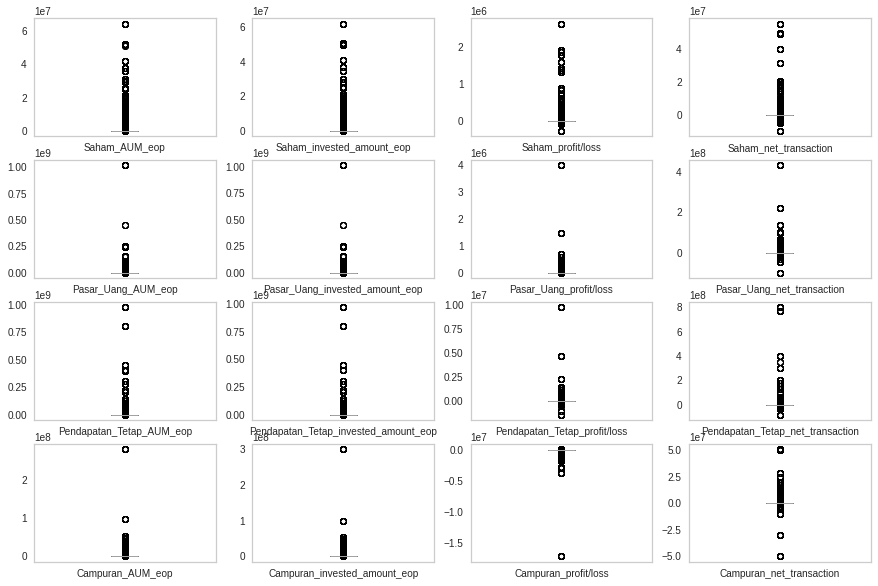

In [ ]:
# Handling outliers

# filter numeric column
numeric_column = ['Saham_AUM_eop','Saham_invested_amount_eop','Saham_profit/loss','Saham_net_transaction',
                  'Pasar_Uang_AUM_eop','Pasar_Uang_invested_amount_eop','Pasar_Uang_profit/loss','Pasar_Uang_net_transaction',
                  'Pendapatan_Tetap_AUM_eop','Pendapatan_Tetap_invested_amount_eop','Pendapatan_Tetap_profit/loss','Pendapatan_Tetap_net_transaction',
                  'Campuran_AUM_eop','Campuran_invested_amount_eop','Campuran_profit/loss','Campuran_net_transaction']

# adjust chart position and chart size
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,10))

# for 0 (i) , Income (el)
for i,el in enumerate(numeric_column):
    a = final_dataset.boxplot(el, ax=axes.flatten()[i],grid=False)

# check outliers in user_age column use boxplot
plt.show()

we shouldn't remove the outlier, because it is a natural part of the population, the variation of the data is indeed large

# 5. EDA 

In [ ]:
# copy the clean dataset
clean_dataset = final_dataset.copy()

## 5.1. Descriptive Statistics


In [ ]:
# Define Eda_df as copy of new_df
Eda_df = merge_1.copy()

# Data descriptive
desc_df = Eda_df.describe()

# Add kurtosis, skewness and variance row for data descriptice statistic

#show kurtosis statistic
desc_df.loc['kurtosis'] = Eda_df.kurt() 

#show Skewness statistic
desc_df.loc['skewness'] = Eda_df.skew() 

#show variance statistic
desc_df.loc['variance'] = Eda_df.var() 
desc_df

,Saham_AUM_eop,Saham_invested_amount_eop,Pasar_Uang_AUM_eop,Pasar_Uang_invested_amount_eop,Pendapatan_Tetap_AUM_eop,Pendapatan_Tetap_invested_amount_eop,Campuran_AUM_eop,Campuran_invested_amount_eop,Saham_profit/loss,Pasar_Uang_profit/loss,Pendapatan_Tetap_profit/loss,Campuran_profit/loss,Saham_net_transaction,Pasar_Uang_net_transaction,Pendapatan_Tetap_net_transaction,Campuran_net_transaction
count,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03
mean,3.473692e+05,3.364478e+05,7.856005e+05,7.833485e+05,1.263754e+06,1.260824e+06,1.836633e+05,1.895738e+05,1.092142e+04,2.251978e+03,2.930248e+03,-5.910545e+03,1.364292e+05,3.273238e+05,6.984263e+05,4.273879e+04
std,2.101070e+06,2.034382e+06,1.361804e+07,1.357219e+07,1.847532e+07,1.836689e+07,3.748921e+06,3.937860e+06,7.094961e+04,4.911016e+04,1.292581e+05,2.040387e+05,1.464789e+06,6.407328e+06,1.492652e+07,1.397833e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.615330e+05,-1.222000e+03,-1.379176e+06,-1.720353e+07,-1.000000e+07,-1.000000e+08,-8.000000e+07,-5.000000e+07
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.001600e+04,1.000000e+04,9.966000e+03,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.030030e+05,1.000000e+05,1.001320e+05,1.000000e+05,1.096230e+05,1.100000e+05,0.000000e+00,0.000000e+00,3.247000e+03,1.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.445433e+07,6.184000e+07,1.016171e+09,1.012200e+09,9.797670e+08,9.700000e+08,2.827965e+08,3.000000e+08,2.614332e+06,3.971140e+06,9.766956e+06,1.801920e+05,5.587000e+07,4.338000e+08,7.990008e+08,5.100000e+07
kurtosis,3.518764e+02,3.495310e+02,3.911741e+03,3.904977e+03,1.541018e+03,1.527588e+03,3.984942e+03,4.133599e+03,4.900646e+02,5.257991e+03,4.171505e+03,6.122599e+03,6.968655e+02,2.756114e+03,1.972404e+03,8.928806e+02
skewness,1.634777e+01,1.630102e+01,5.673113e+01,5.668061e+01,3.553468e+01,3.538845e+01,5.620457e+01,5.743896e+01,1.911973e+01,6.780251e+01,5.912959e+01,-7.401907e+01,2.283386e+01,4.501424e+01,4.107211e+01,1.420567e+01


In [ ]:
# max
max_df = Eda_df.max()
max_df

Saham_AUM_eop                           6.445433e+07
Saham_invested_amount_eop               6.184000e+07
Pasar_Uang_AUM_eop                      1.016171e+09
Pasar_Uang_invested_amount_eop          1.012200e+09
Pendapatan_Tetap_AUM_eop                9.797670e+08
Pendapatan_Tetap_invested_amount_eop    9.700000e+08
Campuran_AUM_eop                        2.827965e+08
Campuran_invested_amount_eop            3.000000e+08
Saham_profit/loss                       2.614332e+06
Pasar_Uang_profit/loss                  3.971140e+06
Pendapatan_Tetap_profit/loss            9.766956e+06
Campuran_profit/loss                    1.801920e+05
Saham_net_transaction                   5.587000e+07
Pasar_Uang_net_transaction              4.338000e+08
Pendapatan_Tetap_net_transaction        7.990008e+08
Campuran_net_transaction                5.100000e+07
dtype: float64

## 5.1. Insight From Data

### How many users we have in the data?

In [ ]:
# number of users in clean_dataset
clean_users = clean_dataset['user_id'].nunique()

print('the number of users we have in the clean dataset is:',clean_users)

the number of users we have in the clean dataset is: 8277


In [ ]:
# number of users in users dataset
raw_users = users_df_clean['user_id'].nunique()

print('the number of users we have in the users dataset is:',raw_users)

the number of users we have in the users dataset is: 14712


The total users we have in users dataset is 14.712, but we have 8277 users in clean dataset. 

It is because clean dataset doesn't include users who registered after September or have not made a transaction

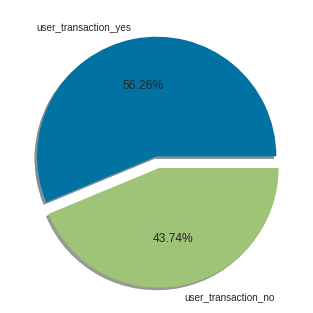

In [ ]:
# pie chart
user_explode = [0,0.1]
user_labels = ['user_transaction_yes', 'user_transaction_no']
user_sizes = [8277, 6435]

plt.pie(user_sizes, autopct='%.2f%%', explode=user_explode, labels=user_labels,shadow=True)

plt.show()

### How many users that have assets in each type of mutual fund?

In [ ]:
# show number of user that have assets in each type of mutual fund
each_type_users = clean_dataset.copy()

# create dataset that include AUM in each type of mutual fund
each_type_users['Saham'] = np.where(each_type_users['Saham_AUM_eop']>0,'yes','no')
each_type_users['Pasar_Uang'] = np.where(each_type_users['Pasar_Uang_AUM_eop']>0,'yes','no')
each_type_users['Pendapatan_Tetap'] = np.where(each_type_users['Pendapatan_Tetap_AUM_eop']>0,'yes','no')
each_type_users['Campuran'] = np.where(each_type_users['Campuran_AUM_eop']>0,'yes','no')


In [ ]:
# number of users that have asset in stocks mutual funds
Saham_users = each_type_users.copy()

Saham_users = Saham_users.groupby(['Saham']).nunique()['user_id'].reset_index()

Saham_users

,Saham,user_id
0,no,4163
1,yes,4114


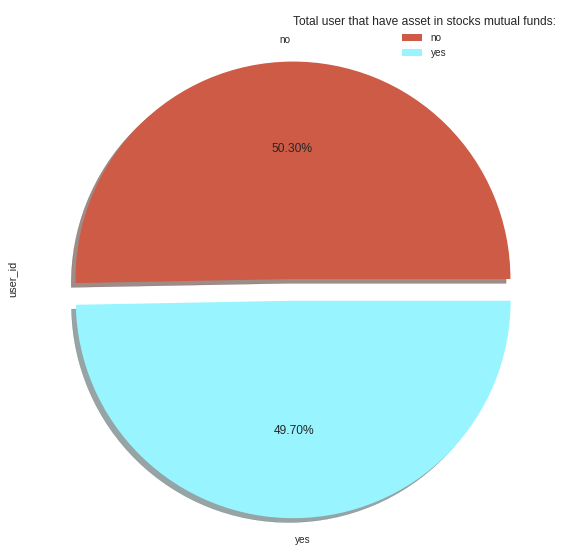

In [ ]:
# This is just a cosmetic
saham_explode = [0,0.1]
saham_colors = ['#CD5B45', '#98F5FF']
saham_labels = ['no', 'yes']

# Show pie plot of Percentage users that have asset in stocks mutual funds
Saham_users.plot.pie(y='user_id', autopct='%.2f%%', figsize=(10,10), labels = saham_labels, explode = saham_explode, colors = saham_colors, shadow = True, rot=0)

# showing legend
plt.legend(title = 'Total user that have asset in stocks mutual funds:')

In [ ]:
# number of users that have asset in money market mutual funds
Pasar_Uang_users = each_type_users.copy()

Pasar_Uang_users = Pasar_Uang_users.groupby(['Pasar_Uang']).nunique()['user_id'].reset_index()

Pasar_Uang_users

,Pasar_Uang,user_id
0,no,3331
1,yes,4946


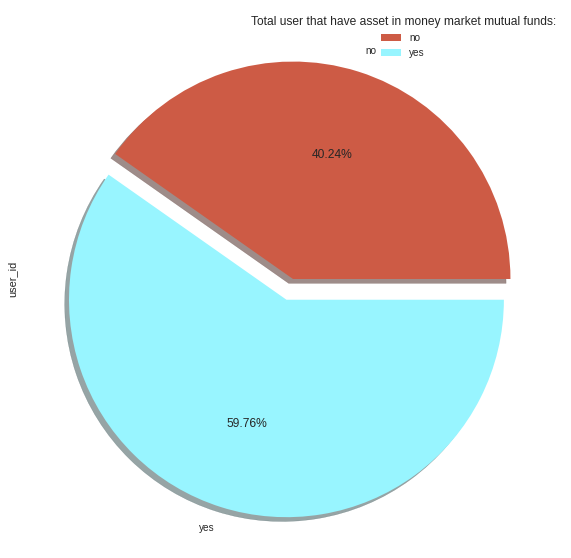

In [ ]:
# This is just a cosmetic
PU_explode = [0,0.1]
PU_colors = ['#CD5B45', '#98F5FF']
PU_labels = ['no', 'yes']

# Show pie plot of Percentage users that have asset in money market mutual funds
Pasar_Uang_users.plot.pie( y='user_id', autopct='%.2f%%', figsize=(10,10), labels = PU_labels, explode = PU_explode, colors = PU_colors, shadow = True, rot=0)

# showing legend
plt.legend(title = 'Total user that have asset in money market mutual funds:')

In [ ]:
# number of users that have asset in bond mutual funds
Pendapatan_Tetap_users = each_type_users.copy()

Pendapatan_Tetap_users = Pendapatan_Tetap_users.groupby(['Pendapatan_Tetap']).nunique()['user_id'].reset_index()

Pendapatan_Tetap_users

,Pendapatan_Tetap,user_id
0,no,4120
1,yes,4157


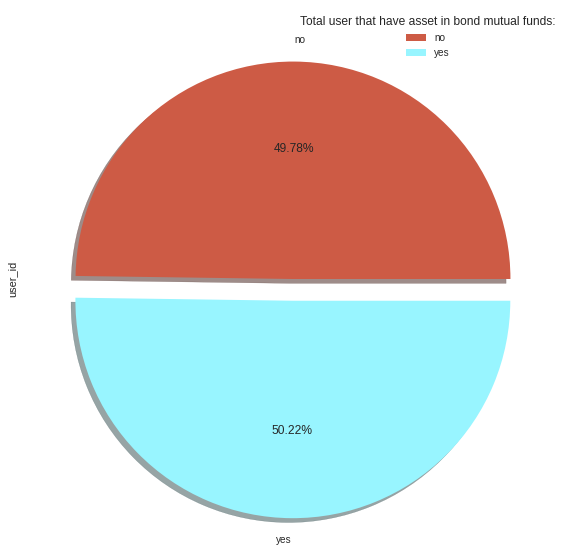

In [ ]:
# This is just a cosmetic
PT_explode = [0,0.1]
PT_colors = ['#CD5B45', '#98F5FF']
PT_labels = ['no', 'yes']

# Show pie plot of Percentage users that have asset in bond mutual funds
Pendapatan_Tetap_users.plot.pie( y='user_id', autopct='%.2f%%', figsize=(10,10), labels = PT_labels, explode = PT_explode, colors = PT_colors, shadow = True, rot=0)

# showing legend
plt.legend(title = 'Total user that have asset in bond mutual funds:')

In [ ]:
# number of users that have asset in mixed mutual funds
Campuran_users = each_type_users.copy()

Campuran_users = Campuran_users.groupby(['Campuran']).nunique()['user_id'].reset_index()

Campuran_users

,Campuran,user_id
0,no,8077
1,yes,200


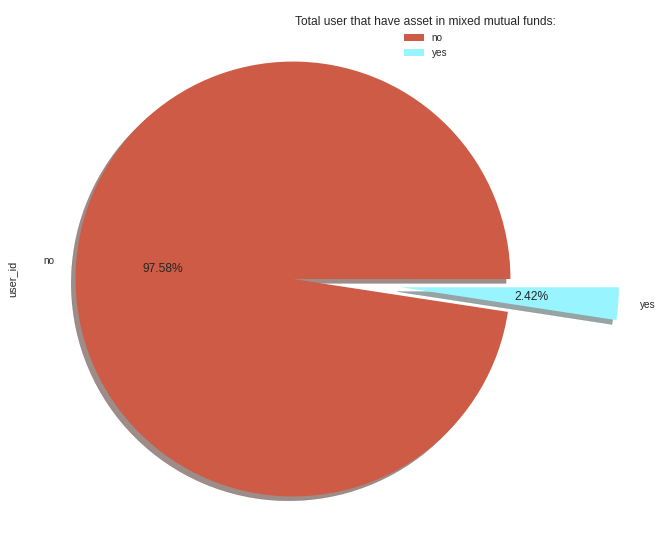

In [ ]:
# This is just a cosmetic
campuran_explode = [0,0.5]
campuran_colors = ['#CD5B45', '#98F5FF']
campuran_labels = ['no', 'yes']

# Show pie plot of Percentage users that have asset in mixed mutual funds
Campuran_users.plot.pie( y='user_id', autopct='%.2f%%', figsize=(10,10), labels = campuran_labels, explode = campuran_explode, colors = campuran_colors, shadow = True, rot=0)

# showing legend
plt.legend(title = 'Total user that have asset in mixed mutual funds:')

Insight:


1.   Half of all users have assets in stocks mutual funds and bond mutual funds
2.   59.76% of all users haave assets in money market mutual funds
3.   only 2.42% of all users that have assets in mixed mutual funds



### % of users based on gender




In [ ]:
# show number of user data (unique) based on gender
gender_users = clean_dataset.copy()

gender_users = gender_users.groupby(['user_gender']).nunique()['user_id'].reset_index()

# You can make additional column (%_user_gender) but without it you can show the labeling via autopict plot
gender_users['%_user_gender'] = ((gender_users['user_id']/(gender_users['user_id'].sum()))*100).round(2)
gender_users

,user_gender,user_id,%_user_gender
0,Female,3101,37.47
1,Male,5176,62.53


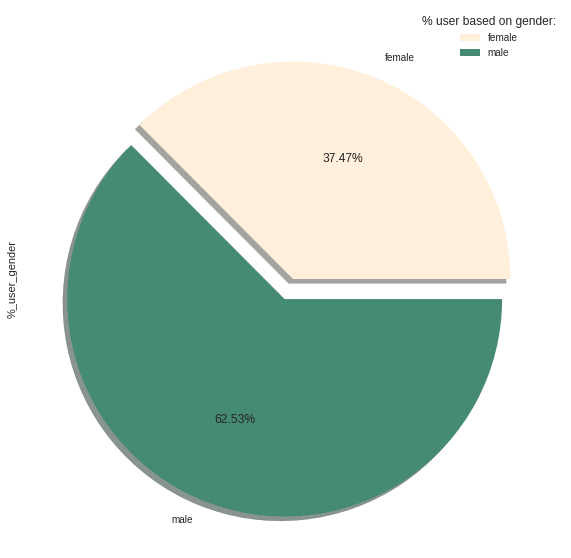

In [ ]:
# This is just a cosmetic
gender_explode = [0,0.1]
gender_colors = ['#FFEFDB', '#458B74']
gender_labels = ['female', 'male']

# Show pie plot of Percentage users based on gender
gender_users.plot.pie( y='%_user_gender', autopct='%.2f%%', figsize=(10,10), labels = gender_labels, explode = gender_explode, colors = gender_colors, shadow = True, rot=0)

# showing legend
plt.legend(title = '% user based on gender:')

Insight:


1.   There are more male users than female users

### Total users based on age


In [ ]:
# show number of user data (unique) based on age
age_users = clean_dataset.copy()

age_users = age_users.groupby(['user_age']).nunique()['user_id'].reset_index()

age_users

,user_age,user_id
0,17,134
1,18,443
2,19,503
3,20,614
4,21,693
5,22,549
6,23,554
7,24,514
8,25,458
9,26,419


In [ ]:
age_users['user_age'].unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 71,
       73, 74, 76, 82, 83])

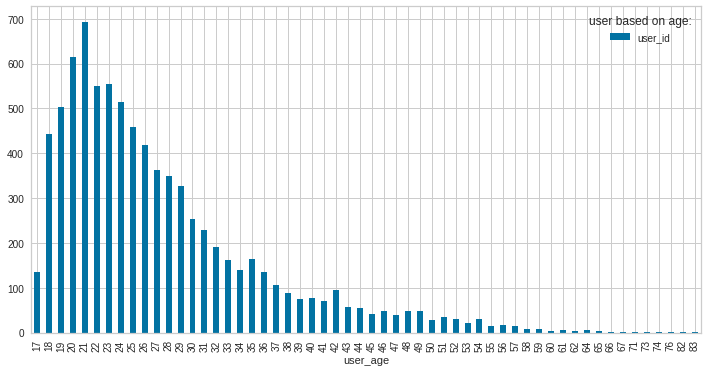

In [ ]:
# Horizontal Bar Plot
age_users.plot.bar('user_age', 'user_id', figsize =(12,6))
 
plt.legend(title = 'user based on age:')

Insight:


1.   The dominating users are users aged 18-30 years



### % of users based on occupation

In [ ]:
# show number of user data (unique) based on occupation
occupation_users = clean_dataset.copy()

occupation_users = occupation_users.groupby(['user_occupation']).nunique()['user_id'].reset_index()

occupation_users

,user_occupation,user_id
0,Guru,60
1,IRT,478
2,Others,928
3,PNS,116
4,Pelajar,4473
5,Pengusaha,324
6,Pensiunan,4
7,Swasta,1868
8,TNI/Polisi,26


In [ ]:
occupation_users['user_occupation'].unique()

array(['Guru', 'IRT', 'Others', 'PNS', 'Pelajar', 'Pengusaha',
       'Pensiunan', 'Swasta', 'TNI/Polisi'], dtype=object)

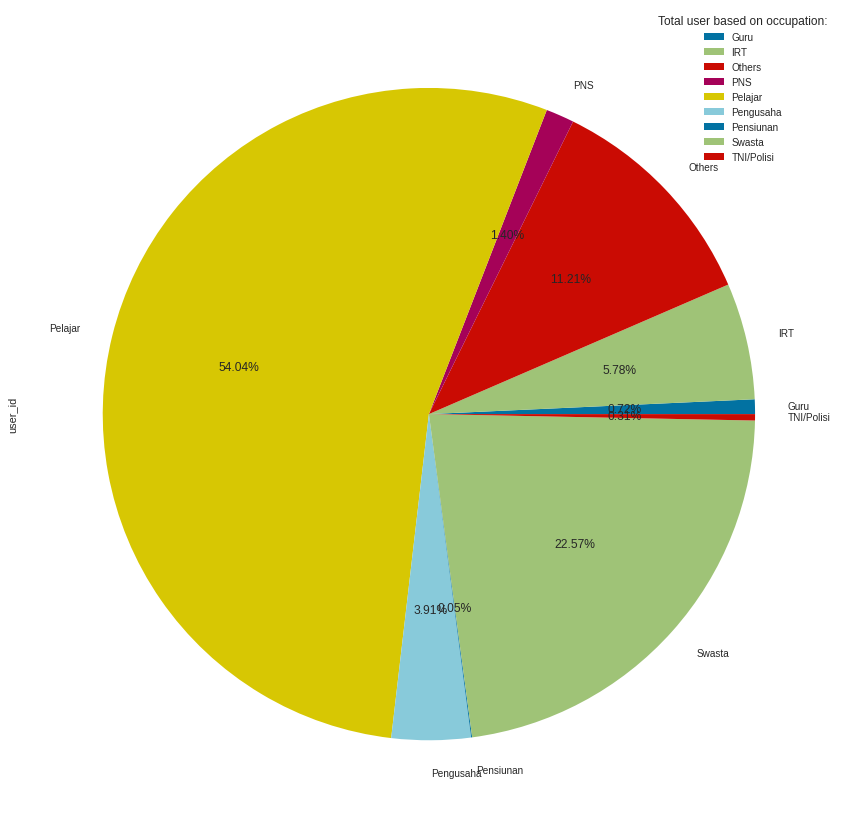

In [ ]:
# This is just a cosmetic
occupation_labels = ['Guru', 'IRT', 'Others', 'PNS', 'Pelajar', 'Pengusaha', 'Pensiunan', 'Swasta', 'TNI/Polisi']

# Show pie plot of Percentage user based on occupation
occupation_users.plot.pie( y='user_id', autopct='%.2f%%', figsize=(15,15), labels = occupation_labels, rot=0)

# showing legend
plt.legend(title = 'Total user based on occupation:')

Insight:


1.   Top 3 user's occupation are student, swasta and others
2.   54.04% of users are student 




### % of users based on income range

In [ ]:
# show number of user data (unique) based on income range
income_range_users = clean_dataset.copy()

income_range_users = income_range_users.groupby(['user_income_range']).nunique()['user_id'].reset_index()

income_range_users

,user_income_range,user_id
0,< 10 Juta,3527
1,> Rp 1 Miliar,16
2,> Rp 100 Juta - 500 Juta,637
3,> Rp 50 Juta - 100 Juta,1343
4,> Rp 500 Juta - 1 Miliar,48
5,Rp 10 Juta - 50 Juta,2706


In [ ]:
income_range_users['user_income_range'].unique()

array(['< 10 Juta', '> Rp 1 Miliar', '> Rp 100 Juta - 500 Juta',
       '> Rp 50 Juta - 100 Juta', '> Rp 500 Juta - 1 Miliar',
       'Rp 10 Juta - 50 Juta'], dtype=object)

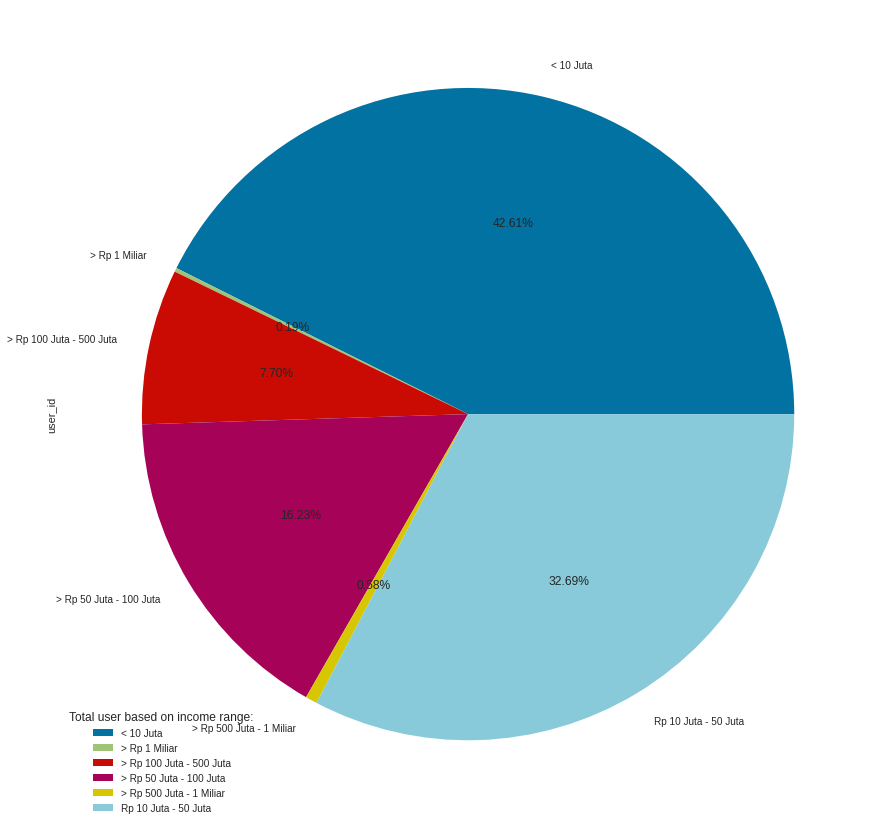

In [ ]:
# This is just a cosmetic
income_range_labels = ['< 10 Juta', '> Rp 1 Miliar', '> Rp 100 Juta - 500 Juta', '> Rp 50 Juta - 100 Juta', '> Rp 500 Juta - 1 Miliar', 'Rp 10 Juta - 50 Juta']

# Show pie plot of Percentage user based on income rage
income_range_users.plot.pie( y='user_id', autopct='%.2f%%', figsize=(15,15), labels = income_range_labels, rot=0)

# showing legend
plt.legend(title = 'Total user based on income range:')

Insight:


1.   users who dominate are users who have an income range of <10 million, and 10-50 million



### Average current AUM of each user

In [ ]:
# Total AUM of each user
Total_AUM_users = merge_1.copy()

Total_AUM_users['Total_AUM'] = Total_AUM_users['Saham_AUM_eop'] + Total_AUM_users['Pasar_Uang_AUM_eop'] + Total_AUM_users['Pendapatan_Tetap_AUM_eop'] + Total_AUM_users['Campuran_AUM_eop']
Total_AUM_users

# Average AUM of each user
avg_AUM = Total_AUM_users['Total_AUM'].mean().round(2)

print('Average current AUM of each user is:',avg_AUM)

Average current AUM of each user is: 2580387.19


### Average current profit of each user

In [ ]:
# Total profit of each user
Total_profit_users = merge_1.copy()

Total_profit_users['Total_AUM'] = Total_profit_users['Saham_profit/loss'] + Total_profit_users['Pasar_Uang_profit/loss'] + Total_profit_users['Pendapatan_Tetap_profit/loss'] + Total_profit_users['Campuran_profit/loss']

#Average current profit of each user
avg_profit = Total_profit_users['Total_AUM'].mean().round(2)

print('Average current profit of each user is:',avg_profit)

Average current profit of each user is: 10193.1


### Buy/Sell Habit (Week-Wise)

In [ ]:
# Use completed transaction datased
buysell_trend_df = clean_dataset.copy()

# Total buy transaction of each user per date
buysell_trend_df['Total_buy_transaction'] = buysell_trend_df['Saham_buy_transaction'] + buysell_trend_df['Pasar_Uang_buy_transaction'] + buysell_trend_df['Pendapatan_Tetap_buy_transaction'] + buysell_trend_df['Campuran_buy_transaction']

# Sum total buy transaction based on date
daily_buy_df = buysell_trend_df.groupby('date').sum()['Total_buy_transaction'].reset_index()
daily_buy_df


,date,Total_buy_transaction
0,2021-08-04,0.0
1,2021-08-05,14570000.0
2,2021-08-06,20880000.0
3,2021-08-09,40975000.0
4,2021-08-10,24922709.0
5,2021-08-11,308536157.0
6,2021-08-12,0.0
7,2021-08-13,404568000.0
8,2021-08-16,457253711.0
9,2021-08-17,52534746.0


In [ ]:
# Sum total buy transaction based on day of week
weekly_buy_df = daily_buy_df[['Total_buy_transaction']].groupby(daily_buy_df['date'].dt.dayofweek).sum().reset_index()
weekly_buy_df

,date,Total_buy_transaction
0,0,3.010543e+09
1,1,1.866455e+09
2,2,2.712352e+09
3,3,2.229398e+09
4,4,2.579822e+09


In [ ]:
# Change numeric days to name of the days
# 0 = Monday ; 1 = Tuesday; 2 = Wednesday; 3 = Thursday; 4 = Friday ; 5 = Saturday; 6 = Sunday
list_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

# Iteration
for i in range(5):
  weekly_buy_df['date'] = weekly_buy_df['date'].replace(i,list_days[i])

weekly_buy_df

,date,Total_buy_transaction
0,Monday,3.010543e+09
1,Tuesday,1.866455e+09
2,Wednesday,2.712352e+09
3,Thursday,2.229398e+09
4,Friday,2.579822e+09


In [ ]:
# Total sell transaction of each user per date
buysell_trend_df['Total_sell_transaction'] = buysell_trend_df['Saham_sell_transaction'] + buysell_trend_df['Pasar_Uang_sell_transaction'] + buysell_trend_df['Pendapatan_Tetap_sell_transaction'] + buysell_trend_df['Campuran_sell_transaction']

# Sum total sell transaction based on date
daily_sell_df = buysell_trend_df.groupby('date').sum()['Total_sell_transaction'].reset_index()
daily_sell_df

,date,Total_sell_transaction
0,2021-08-04,0.0
1,2021-08-05,700000.0
2,2021-08-06,1124930.0
3,2021-08-09,57814132.0
4,2021-08-10,188350000.0
5,2021-08-11,21795994.0
6,2021-08-12,13331504.0
7,2021-08-13,8529745.0
8,2021-08-16,13906158.0
9,2021-08-17,19524237.0


In [ ]:
# Sum total sell transaction based on day of week
weekly_sell_df = daily_sell_df[['Total_sell_transaction']].groupby(daily_sell_df['date'].dt.dayofweek).sum().reset_index()
weekly_sell_df

,date,Total_sell_transaction
0,0,632364409.0
1,1,647620122.0
2,2,364440958.0
3,3,453631527.0
4,4,327405758.0


In [ ]:
# Change numeric days to name of the days
# 0 = Monday ; 1 = Tuesday; 2 = Wednesday; 3 = Thursday; 4 = Friday ; 5 = Saturday; 6 = Sunday
list_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

# Iteration
for i in range(5):
  weekly_sell_df['date'] = weekly_sell_df['date'].replace(i,list_days[i])

weekly_sell_df

,date,Total_sell_transaction
0,Monday,632364409.0
1,Tuesday,647620122.0
2,Wednesday,364440958.0
3,Thursday,453631527.0
4,Friday,327405758.0


In [ ]:
# Join buy dataset and sell dataset
weekly_buysell_df = weekly_buy_df.merge(weekly_sell_df, how = 'inner', on='date')
weekly_buysell_df

,date,Total_buy_transaction,Total_sell_transaction
0,Monday,3.010543e+09,632364409.0
1,Tuesday,1.866455e+09,647620122.0
2,Wednesday,2.712352e+09,364440958.0
3,Thursday,2.229398e+09,453631527.0
4,Friday,2.579822e+09,327405758.0


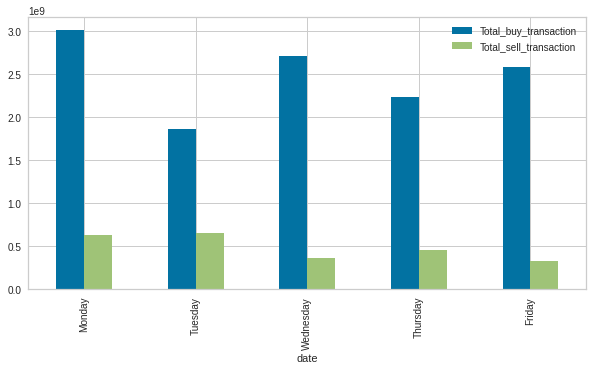

In [ ]:
# Make bar plot based on week-wise
weekly_buysell_df.plot.bar('date', figsize =(10,5))
 


Insight


1. the total buy transaction is more than the total sell transaction in a whole week
2. Peak total buy transaction are in Monday
3. Peak total sell transaction are in Tuesday



### Daily Transaction Trend

In [ ]:
transaction_trend_df = new_df_2.copy()

# Total transaction of each user per date
transaction_trend_df['Total_transaction'] = transaction_trend_df['Saham_transaction_amount'] + transaction_trend_df['Pasar_Uang_transaction_amount'] + transaction_trend_df['Pendapatan_Tetap_transaction_amount'] + transaction_trend_df['Campuran_transaction_amount']

# Sum total transaction based on date
daily_transaction_df = transaction_trend_df.groupby('date').sum()['Total_transaction'].reset_index()
daily_transaction_df


,date,Total_transaction
0,2021-08-04,0.0
1,2021-08-05,13870000.0
2,2021-08-06,19755070.0
3,2021-08-09,-16839132.0
4,2021-08-10,-163427291.0
5,2021-08-11,286740163.0
6,2021-08-12,-13331504.0
7,2021-08-13,396038255.0
8,2021-08-16,443347553.0
9,2021-08-17,33010509.0


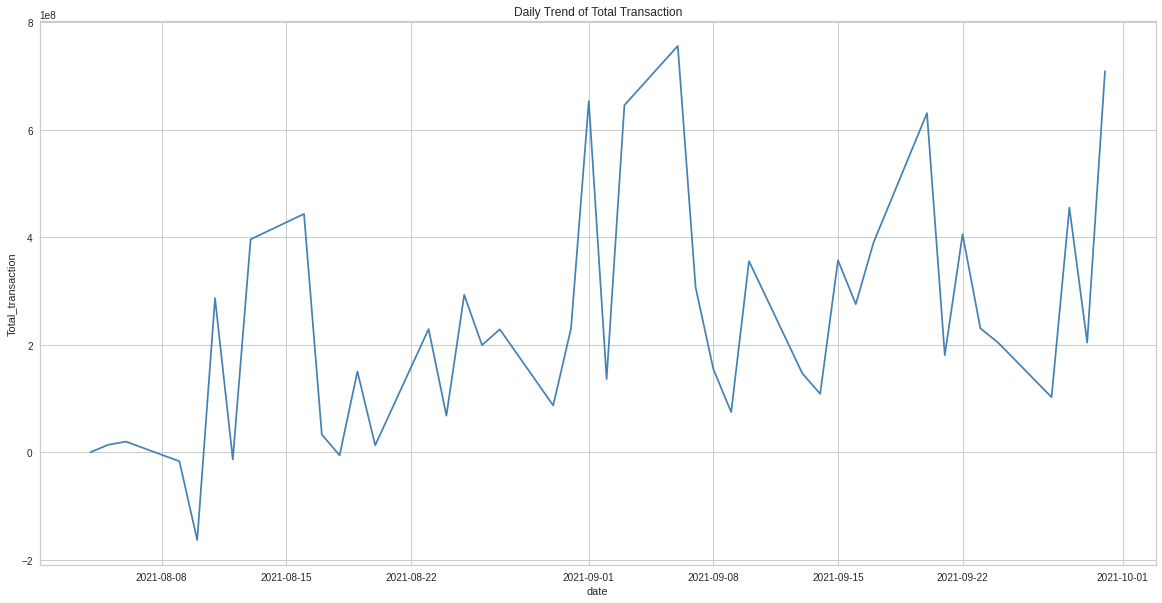

In [ ]:
# Bar Plot Daily Trend of Total Transaction  
fig, amount_sns= plt.subplots(figsize=(20,10))
amount_sns = sns.lineplot(data = daily_transaction_df, x='date', y='Total_transaction', color = 'steelblue')

# Labelling
amount_sns.set_xlabel('date')
amount_sns.set_ylabel('Total_transaction')

# Title name
plt.title('Daily Trend of Total Transaction')
plt.show()

Insight:
 


1.   It can be seen that the total transactions in September were greater than the previous month
2.   The second week in August and the first week in September are the weeks with the highest total transactions



# [MILESTONE 2]

# 6. Data Preparation

In [ ]:
# copy the clean dataset 
cluster_df = users_df_clean[['user_id','user_age','user_occupation','user_income_range']]
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            14712 non-null  int64 
 1   user_age           14712 non-null  int64 
 2   user_occupation    14712 non-null  object
 3   user_income_range  14712 non-null  object
dtypes: int64(2), object(2)
memory usage: 459.9+ KB


column that we need:


1.   user_id
2.   user_gender
3.   user_age
4.   user_occupation
5.   user_income_range
6.   referral_code_used
7.   total_buy
8.   total_sell
9.   number_of_buy
10.   number_of_sell



## 6.1. Total Buy 

In [ ]:
# Total buy transaction of each user 
# Use completed transaction datased
transaction_df = clean_dataset.copy()

# Total buy transaction of each user per date
transaction_df['total_buy'] = transaction_df['Saham_buy_transaction'] + transaction_df['Pasar_Uang_buy_transaction'] + transaction_df['Pendapatan_Tetap_buy_transaction'] + transaction_df['Campuran_buy_transaction']

# Sum total buy transaction based on user
total_buy_df = transaction_df.groupby('user_id').sum()['total_buy'].reset_index()
total_buy_df


,user_id,total_buy
0,50701,0.0
1,50961,3100000.0
2,53759,0.0
3,54759,2000000.0
4,61414,0.0
5,66145,140000.0
6,67251,1000000.0
7,70568,0.0
8,71229,0.0
9,72676,120613.0


## 6.2. Total Sell

In [ ]:
# Total sell transaction of each user per date
transaction_df['total_sell'] = transaction_df['Saham_sell_transaction'] + transaction_df['Pasar_Uang_sell_transaction'] + transaction_df['Pendapatan_Tetap_sell_transaction'] + transaction_df['Campuran_sell_transaction']

# Sum total buy transaction based on user
total_sell_df = transaction_df.groupby('user_id').sum()['total_sell'].reset_index()
total_sell_df


,user_id,total_sell
0,50701,0.0
1,50961,0.0
2,53759,0.0
3,54759,0.0
4,61414,10000.0
5,66145,0.0
6,67251,0.0
7,70568,0.0
8,71229,5000000.0
9,72676,20760.0


## 6.3. Number of Buy

In [ ]:
# Number of Saham buy transaction of each user 
Saham_buy = transaction_df.loc[transaction_df['Saham_buy_transaction'] > 0]
number_of_buy_Saham = Saham_buy.groupby('user_id').nunique()['Saham_buy_transaction'].reset_index()

# Number of Pasar Uang buy transaction of each user 
Pasar_Uang_buy = transaction_df.loc[transaction_df['Pasar_Uang_buy_transaction'] > 0]
number_of_buy_Pasar_Uang = Pasar_Uang_buy.groupby('user_id').nunique()['Pasar_Uang_buy_transaction'].reset_index()

# Number of Pendapatan Tetap buy transaction of each user 
Pendapatan_Tetap_buy = transaction_df.loc[transaction_df['Pendapatan_Tetap_buy_transaction'] > 0]
number_of_buy_Pendapatan_Tetap = Pendapatan_Tetap_buy.groupby('user_id').nunique()['Pendapatan_Tetap_buy_transaction'].reset_index()

# Number of Campuran buy transaction of each user 
Campuran_buy = transaction_df.loc[transaction_df['Campuran_buy_transaction'] > 0]
number_of_buy_Campuran = Campuran_buy.groupby('user_id').nunique()['Campuran_buy_transaction'].reset_index()


In [ ]:
# merge all table
number_of_buy_1 = number_of_buy_Saham.merge(number_of_buy_Pasar_Uang, how='outer', on='user_id') 
number_of_buy_2 = number_of_buy_1.merge(number_of_buy_Pendapatan_Tetap, how='outer', on='user_id') 
number_of_buy_3 = number_of_buy_2.merge(number_of_buy_Campuran, how='outer', on='user_id') 

number_of_buy_3.fillna(0, inplace = True)
number_of_buy_3

,user_id,Saham_buy_transaction,Pasar_Uang_buy_transaction,Pendapatan_Tetap_buy_transaction,Campuran_buy_transaction
0,50961,2.0,1.0,1.0,0.0
1,66145,1.0,0.0,0.0,0.0
2,67251,1.0,1.0,1.0,0.0
3,72676,1.0,1.0,0.0,0.0
4,82753,1.0,1.0,2.0,0.0
5,103108,2.0,0.0,0.0,0.0
6,135063,2.0,2.0,2.0,0.0
7,138518,1.0,1.0,1.0,0.0
8,142752,1.0,1.0,1.0,0.0
9,145995,1.0,0.0,0.0,0.0


In [ ]:
# Total buy transaction of each user
number_of_buy_3['number_of_buy'] = number_of_buy_3['Saham_buy_transaction'] + number_of_buy_3['Pasar_Uang_buy_transaction'] + number_of_buy_3['Pendapatan_Tetap_buy_transaction'] + number_of_buy_3['Campuran_buy_transaction']

# dataset that include user_id and number of buy
number_of_buy_df = number_of_buy_3[['user_id','number_of_buy']]
number_of_buy_df

,user_id,number_of_buy
0,50961,4.0
1,66145,1.0
2,67251,3.0
3,72676,2.0
4,82753,4.0
5,103108,2.0
6,135063,6.0
7,138518,3.0
8,142752,3.0
9,145995,1.0


## 6.4. Number of Sell

In [ ]:
# Number of Saham sell transaction of each user 
Saham_sell = transaction_df.loc[transaction_df['Saham_sell_transaction'] > 0]
number_of_sell_Saham = Saham_sell.groupby('user_id').nunique()['Saham_sell_transaction'].reset_index()

# Number of Pasar Uang sell transaction of each user 
Pasar_Uang_sell = transaction_df.loc[transaction_df['Pasar_Uang_sell_transaction'] > 0]
number_of_sell_Pasar_Uang = Pasar_Uang_sell.groupby('user_id').nunique()['Pasar_Uang_sell_transaction'].reset_index()

# Number of Pendapatan Tetap sell transaction of each user 
Pendapatan_Tetap_sell = transaction_df.loc[transaction_df['Pendapatan_Tetap_sell_transaction'] > 0]
number_of_sell_Pendapatan_Tetap = Pendapatan_Tetap_sell.groupby('user_id').nunique()['Pendapatan_Tetap_sell_transaction'].reset_index()

# Number of Campuran sell transaction of each user 
Campuran_sell = transaction_df.loc[transaction_df['Campuran_sell_transaction'] > 0]
number_of_sell_Campuran = Campuran_sell.groupby('user_id').nunique()['Campuran_sell_transaction'].reset_index()


In [ ]:
# merge all table
number_of_sell_1 = number_of_sell_Saham.merge(number_of_sell_Pasar_Uang, how='outer', on='user_id') 
number_of_sell_2 = number_of_sell_1.merge(number_of_sell_Pendapatan_Tetap, how='outer', on='user_id') 
number_of_sell_3 = number_of_sell_2.merge(number_of_sell_Campuran, how='outer', on='user_id') 

number_of_sell_3.fillna(0, inplace = True)
number_of_sell_3

,user_id,Saham_sell_transaction,Pasar_Uang_sell_transaction,Pendapatan_Tetap_sell_transaction,Campuran_sell_transaction
0,61414,1.0,0.0,0.0,0.0
1,72676,1.0,0.0,0.0,0.0
2,82753,2.0,2.0,2.0,0.0
3,103538,1.0,1.0,1.0,0.0
4,108559,1.0,1.0,1.0,0.0
5,155512,2.0,1.0,1.0,0.0
6,172974,1.0,1.0,1.0,0.0
7,184419,1.0,1.0,1.0,0.0
8,225054,1.0,0.0,1.0,0.0
9,247102,2.0,1.0,2.0,0.0


In [ ]:
# Total sell transaction of each user
number_of_sell_3['number_of_sell'] = number_of_sell_3['Saham_sell_transaction'] + number_of_sell_3['Pasar_Uang_sell_transaction'] + number_of_sell_3['Pendapatan_Tetap_sell_transaction'] + number_of_sell_3['Campuran_sell_transaction']

# dataset that include user_id and number of sell
number_of_sell_df = number_of_sell_3[['user_id','number_of_sell']]
number_of_sell_df

,user_id,number_of_sell
0,61414,1.0
1,72676,1.0
2,82753,6.0
3,103538,3.0
4,108559,3.0
5,155512,4.0
6,172974,3.0
7,184419,3.0
8,225054,2.0
9,247102,5.0


## 6.5. Merge Data

In [ ]:
cluster_merge_1 = cluster_df.merge(total_buy_df, how='inner', on='user_id') 
cluster_merge_2 = cluster_merge_1.merge(total_sell_df, how='outer', on='user_id') 
cluster_merge_3 = cluster_merge_2.merge(number_of_buy_df, how='outer', on='user_id') 
cluster_merge_4 = cluster_merge_3.merge(number_of_sell_df, how='outer', on='user_id') 

cluster_merge_4

,user_id,user_age,user_occupation,user_income_range,total_buy,total_sell,number_of_buy,number_of_sell
0,3816789,53,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,1.0,NaN
1,3802293,47,PNS,> Rp 500 Juta - 1 Miliar,8500000.0,0.0,6.0,NaN
2,3049927,53,Swasta,< 10 Juta,149000.0,0.0,1.0,NaN
3,3836491,59,Others,< 10 Juta,0.0,0.0,NaN,NaN
4,3783302,57,Swasta,> Rp 50 Juta - 100 Juta,1000000.0,1889569.0,3.0,3.0
5,3718933,50,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,0.0,NaN,NaN
6,3820160,58,IRT,> Rp 50 Juta - 100 Juta,105000.0,0.0,3.0,NaN
7,3770075,54,Swasta,< 10 Juta,10000.0,0.0,1.0,NaN
8,3802815,53,IRT,> Rp 100 Juta - 500 Juta,0.0,0.0,NaN,NaN
9,3777767,57,Others,Rp 10 Juta - 50 Juta,0.0,0.0,NaN,NaN


In [ ]:
final_cluster_df = cluster_merge_4.copy()
final_cluster_df.fillna(0, inplace = True)
final_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            8277 non-null   int64  
 1   user_age           8277 non-null   int64  
 2   user_occupation    8277 non-null   object 
 3   user_income_range  8277 non-null   object 
 4   total_buy          8277 non-null   float64
 5   total_sell         8277 non-null   float64
 6   number_of_buy      8277 non-null   float64
 7   number_of_sell     8277 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 582.0+ KB


## 6.6. Labelling

In [ ]:
# Income Range Labelling
final_cluster_df['user_income_range'] = final_cluster_df['user_income_range'].astype('category')

scale_income_range = {'< 10 Juta':0, 
                      'Rp 10 Juta - 50 Juta':1, 
                      '> Rp 50 Juta - 100 Juta':2,
                      '> Rp 100 Juta - 500 Juta':3,
                      '> Rp 500 Juta - 1 Miliar':4,
                      '> Rp 1 Miliar':5}

final_cluster_df['user_income_range_category'] = final_cluster_df['user_income_range'].replace(scale_income_range)
final_cluster_df['user_income_range_category'] = final_cluster_df['user_income_range_category'].astype('category')

final_cluster_df

,user_id,user_age,user_occupation,user_income_range,total_buy,total_sell,number_of_buy,number_of_sell,user_income_range_category
0,3816789,53,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,1.0,0.0,2
1,3802293,47,PNS,> Rp 500 Juta - 1 Miliar,8500000.0,0.0,6.0,0.0,4
2,3049927,53,Swasta,< 10 Juta,149000.0,0.0,1.0,0.0,0
3,3836491,59,Others,< 10 Juta,0.0,0.0,0.0,0.0,0
4,3783302,57,Swasta,> Rp 50 Juta - 100 Juta,1000000.0,1889569.0,3.0,3.0,2
5,3718933,50,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3
6,3820160,58,IRT,> Rp 50 Juta - 100 Juta,105000.0,0.0,3.0,0.0,2
7,3770075,54,Swasta,< 10 Juta,10000.0,0.0,1.0,0.0,0
8,3802815,53,IRT,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3
9,3777767,57,Others,Rp 10 Juta - 50 Juta,0.0,0.0,0.0,0.0,1


In [ ]:
final_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   user_id                     8277 non-null   int64   
 1   user_age                    8277 non-null   int64   
 2   user_occupation             8277 non-null   object  
 3   user_income_range           8277 non-null   category
 4   total_buy                   8277 non-null   float64 
 5   total_sell                  8277 non-null   float64 
 6   number_of_buy               8277 non-null   float64 
 7   number_of_sell              8277 non-null   float64 
 8   user_income_range_category  8277 non-null   category
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 533.9+ KB


In [ ]:
# Occupation Labelling
final_cluster_df['user_occupation'] = final_cluster_df['user_occupation'].astype('category')

# Legend
dict(zip(final_cluster_df['user_occupation'].cat.codes, final_cluster_df['user_occupation']))

{1: 'IRT',
 3: 'PNS',
 7: 'Swasta',
 2: 'Others',
 5: 'Pengusaha',
 6: 'Pensiunan',
 0: 'Guru',
 8: 'TNI/Polisi',
 4: 'Pelajar'}

In [ ]:
final_cluster_df['user_occupation_category'] = final_cluster_df['user_occupation'].cat.codes
final_cluster_df['user_occupation_category'] = final_cluster_df['user_occupation_category'].astype('category')

final_cluster_df

,user_id,user_age,user_occupation,user_income_range,total_buy,total_sell,number_of_buy,number_of_sell,user_income_range_category,user_occupation_category
0,3816789,53,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,1.0,0.0,2,1
1,3802293,47,PNS,> Rp 500 Juta - 1 Miliar,8500000.0,0.0,6.0,0.0,4,3
2,3049927,53,Swasta,< 10 Juta,149000.0,0.0,1.0,0.0,0,7
3,3836491,59,Others,< 10 Juta,0.0,0.0,0.0,0.0,0,2
4,3783302,57,Swasta,> Rp 50 Juta - 100 Juta,1000000.0,1889569.0,3.0,3.0,2,7
5,3718933,50,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3,5
6,3820160,58,IRT,> Rp 50 Juta - 100 Juta,105000.0,0.0,3.0,0.0,2,1
7,3770075,54,Swasta,< 10 Juta,10000.0,0.0,1.0,0.0,0,7
8,3802815,53,IRT,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3,1
9,3777767,57,Others,Rp 10 Juta - 50 Juta,0.0,0.0,0.0,0.0,1,2


In [ ]:
final_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   user_id                     8277 non-null   int64   
 1   user_age                    8277 non-null   int64   
 2   user_occupation             8277 non-null   category
 3   user_income_range           8277 non-null   category
 4   total_buy                   8277 non-null   float64 
 5   total_sell                  8277 non-null   float64 
 6   number_of_buy               8277 non-null   float64 
 7   number_of_sell              8277 non-null   float64 
 8   user_income_range_category  8277 non-null   category
 9   user_occupation_category    8277 non-null   category
dtypes: category(4), float64(4), int64(2)
memory usage: 486.1 KB


## 6.7. Scale

In [ ]:
# Define Scale dataset
scale_cluster_df = final_cluster_df.copy()

# Scaling numeric column
numeric_column = ['user_age', 'total_buy', 'total_sell', 'number_of_buy', 'number_of_sell']

# using Standard Scaler
scaler = StandardScaler()
scale_cluster_df[numeric_column] = scaler.fit_transform(scale_cluster_df[numeric_column])
scale_cluster_df.head()

,user_id,user_age,user_occupation,user_income_range,total_buy,total_sell,number_of_buy,number_of_sell,user_income_range_category,user_occupation_category
0,3816789,3.011543,IRT,> Rp 50 Juta - 100 Juta,-0.081438,-0.081042,-0.120296,-0.517689,2,1
1,3802293,2.310759,PNS,> Rp 500 Juta - 1 Miliar,0.407905,-0.081042,1.888757,-0.517689,4,3
2,3049927,3.011543,Swasta,< 10 Juta,-0.078584,-0.081042,-0.120296,-0.517689,0,7
3,3836491,3.712327,Others,< 10 Juta,-0.087264,-0.081042,-0.522106,-0.517689,0,2
4,3783302,3.478732,Swasta,> Rp 50 Juta - 100 Juta,-0.029008,0.441536,0.683325,1.866791,2,7


In [ ]:
#sns.scatterplot (data = scale_cluster_df, x='number_of_buy', y='total_buy', color = 'cornflowerblue')

# 7. Clustering Analysis

In [ ]:
#fc_df = final_cluster_df[['user_age','user_income_range_category','user_occupation_category','number_of_buy','number_of_sell','total_buy','total_sell']]
#fc_df.head()

In [ ]:
ca_df = scale_cluster_df[['user_age','user_income_range_category','user_occupation_category','total_buy','number_of_buy','total_sell','number_of_sell']]
ca_df

,user_age,user_income_range_category,user_occupation_category,total_buy,number_of_buy,total_sell,number_of_sell
0,3.011543,2,1,-0.081438,-0.120296,-0.081042,-0.517689
1,2.310759,4,3,0.407905,1.888757,-0.081042,-0.517689
2,3.011543,0,7,-0.078584,-0.120296,-0.081042,-0.517689
3,3.712327,0,2,-0.087264,-0.522106,-0.081042,-0.517689
4,3.478732,2,7,-0.029008,0.683325,0.441536,1.866791
5,2.661151,3,5,-0.087264,-0.522106,-0.081042,-0.517689
6,3.595530,2,1,-0.081147,0.683325,-0.081042,-0.517689
7,3.128340,0,7,-0.086681,-0.120296,-0.081042,-0.517689
8,3.011543,3,1,-0.087264,-0.522106,-0.081042,-0.517689
9,3.478732,1,2,-0.087264,-0.522106,-0.081042,-0.517689


## 7.1. Determine Cluster Number 

### 7.1.1. Elbow Method

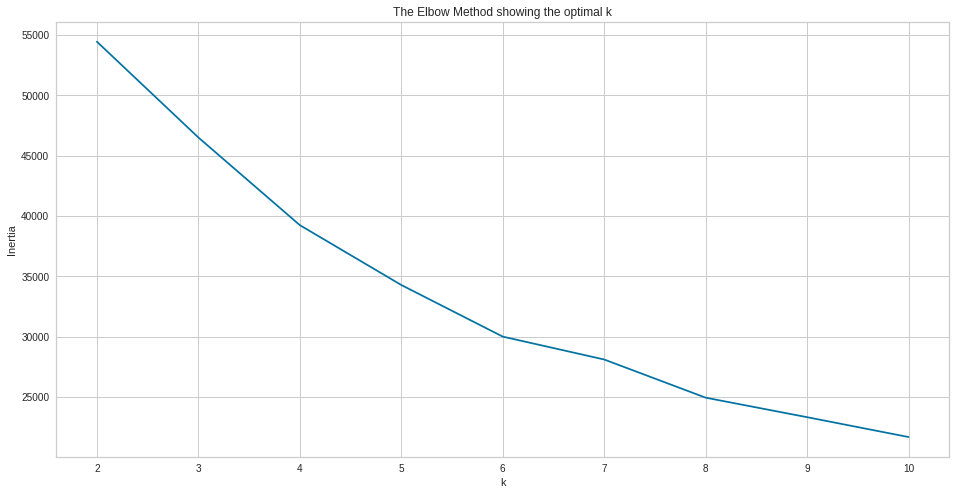

[54452.464906671885, 46509.079875222655, 39238.66541694638, 34275.59162856593, 29992.920037069696, 28094.8277473645, 24929.67543592258, 23310.68236404987, 21664.710449352955]


In [ ]:
# K-Means Clustering
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ca_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### 7.1.2. Silhouette Method

for k=2, the average silhouette score is 0.4211440112546106
for k=3, the average silhouette score is 0.37204268711088134
for k=4, the average silhouette score is 0.3781327276282782
for k=5, the average silhouette score is 0.3785365475672172
for k=6, the average silhouette score is 0.38155954437292344
for k=7, the average silhouette score is 0.38618184343332873
for k=8, the average silhouette score is 0.36125124990387875
for k=9, the average silhouette score is 0.28945572316801166
for k=10, the average silhouette score is 0.30098527467893454


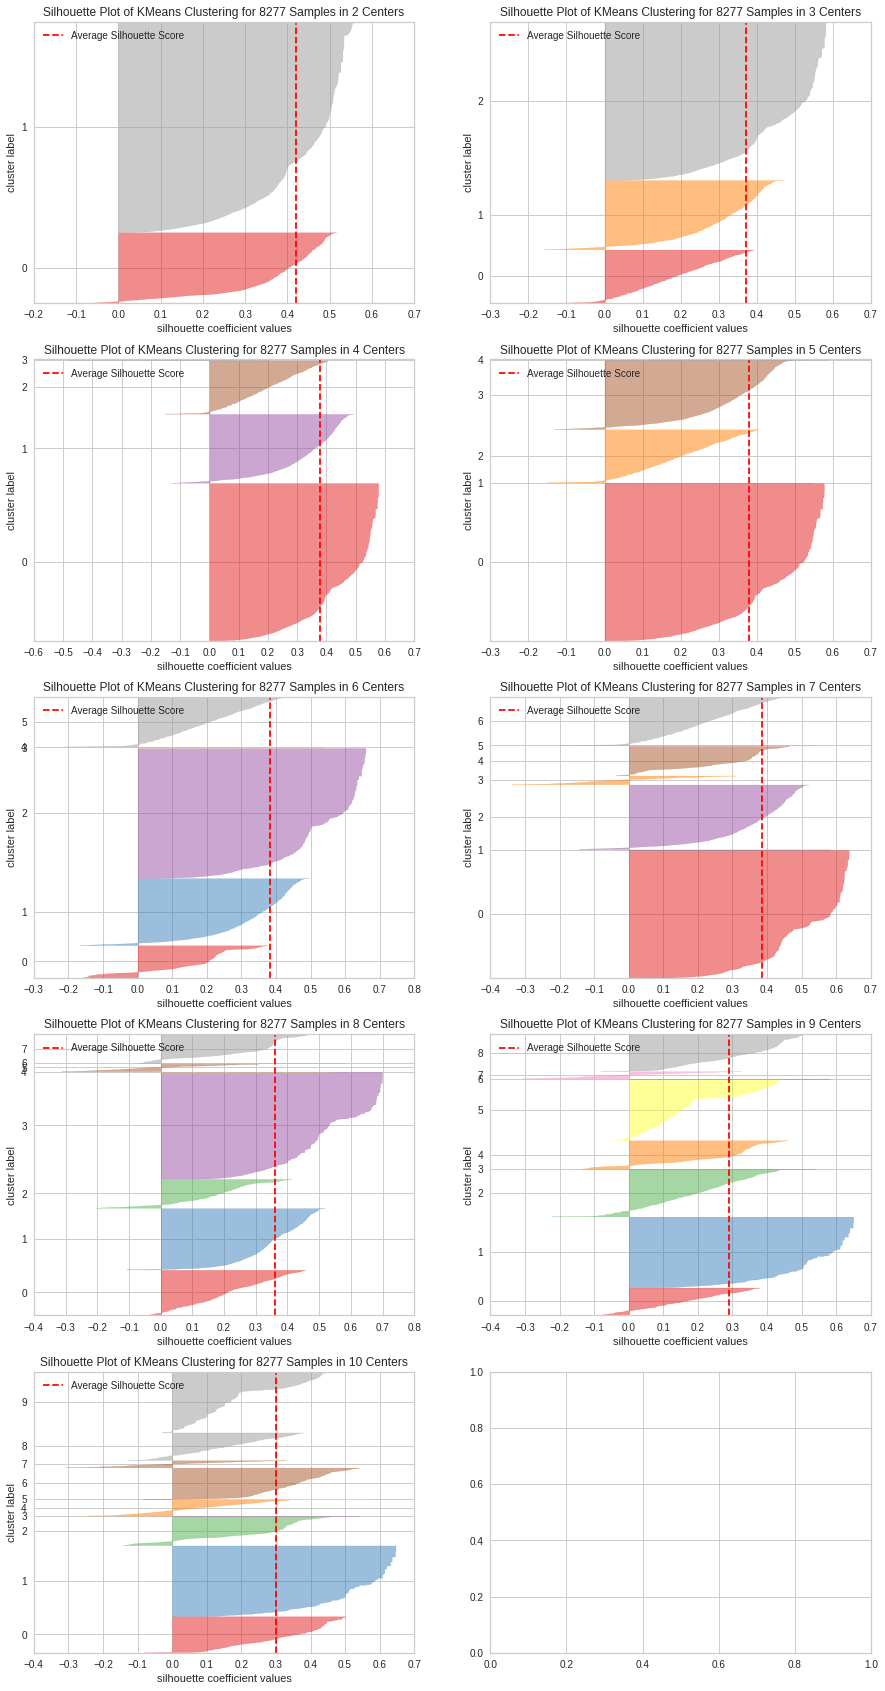

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters, 2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(ca_df)
  sil.finalize()
  print(f"for k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")


the number of selected clusters is 3.

Although it seen from the average silhouette score the best cluster is 2, but the distribution of users per cluster is very unbalanced. The number of cluster with the most balanced distribution of users compared to other clusters is 3 clusters.

Consideration of cluster 3 can also be seen from the elbow method

## 7.2. Create Cluster

we will do clustering using the kmeans method because we want to classify users based on user age, occupation, income range, total buy and sell, and number of buy and sell

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(ca_df)
cluster_label = cluster_model.labels_
final_cluster_df['cluster'] = cluster_label
final_cluster_df

,user_id,user_age,user_occupation,user_income_range,total_buy,total_sell,number_of_buy,number_of_sell,user_income_range_category,user_occupation_category,cluster
0,3816789,53,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,1.0,0.0,2,1,0
1,3802293,47,PNS,> Rp 500 Juta - 1 Miliar,8500000.0,0.0,6.0,0.0,4,3,0
2,3049927,53,Swasta,< 10 Juta,149000.0,0.0,1.0,0.0,0,7,2
3,3836491,59,Others,< 10 Juta,0.0,0.0,0.0,0.0,0,2,0
4,3783302,57,Swasta,> Rp 50 Juta - 100 Juta,1000000.0,1889569.0,3.0,3.0,2,7,2
5,3718933,50,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3,5,2
6,3820160,58,IRT,> Rp 50 Juta - 100 Juta,105000.0,0.0,3.0,0.0,2,1,0
7,3770075,54,Swasta,< 10 Juta,10000.0,0.0,1.0,0.0,0,7,2
8,3802815,53,IRT,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,3,1,0
9,3777767,57,Others,Rp 10 Juta - 50 Juta,0.0,0.0,0.0,0.0,1,2,0


## 7.3. Check agg for each cluster

In [ ]:
# Total users in each cluster
final_cluster_df.groupby('cluster')['user_id'].agg(['count'])

,count
cluster,
0,1575
1,4656
2,2046


Total users in each cluster:


*   cluster 0: 4656
*   cluster 1: 1575
*   cluster 2: 2046











In [ ]:
# User age in each cluster
final_cluster_df.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1575,31.415238,29.0,82,17
1,4656,22.621993,22.0,42,17
2,2046,34.436461,33.0,83,17


In [ ]:
final_cluster_df.groupby(['cluster'])['user_age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1575.0,31.415238,10.162668,17.0,24.0,29.0,37.0,82.0
1,4656.0,22.621993,3.752799,17.0,20.0,22.0,25.0,42.0
2,2046.0,34.436461,8.447139,17.0,28.0,33.0,39.0,83.0




1.   Cluster 0:
*   Average user age: 22.6 
*   Q1: 20
*   Q2: 22
*   Q3: 25


2.   Cluster 1:
*   Average user age: 31.4
*   Q1: 24
*   Q2: 29
*   Q3: 37


3.   Cluster 2:
*   Average user age: 34.4
*   Q1: 28
*   Q2: 33
*   Q3: 39

In [ ]:
# Total buy in each cluster
final_cluster_df.groupby(['cluster'])['total_buy'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1575,1.904265e+06,0.0,433800000.0,0.0
1,4656,5.933627e+05,0.0,155014673.0,0.0
2,2046,3.243722e+06,0.0,799500000.0,0.0


In [ ]:
final_cluster_df.groupby(['cluster']).sum()['total_buy'].reset_index()

,cluster,total_buy
0,0,2.999218e+09
1,1,2.762697e+09
2,2,6.636654e+09


1.   Cluster 0:
*   average total buy: 593,362.7
*   total buy: 2,762,697,000


2.   Cluster 1:
*   average total buy: 1,904,265
*   total buy: 2,999,218,000

3.   Cluster 2:
*   average total buy: 3,243,722
*   total buy: 6,636,654,000




In [ ]:
# Total sell in each cluster
final_cluster_df.groupby(['cluster'])['total_sell'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1575,330561.964444,0.0,131109580.0,0.0
1,4656,213666.795318,0.0,112500000.0,0.0
2,2046,444767.879277,0.0,185000000.0,0.0


In [ ]:
final_cluster_df.groupby(['cluster']).sum()['total_sell'].reset_index()

,cluster,total_sell
0,0,520635094.0
1,1,994832599.0
2,2,909995081.0


1.   Cluster 0:
*   average total sell: 213,666.8
*   total sell: 994,832,599


2.   Cluster 1:
*   average total sell: 330,562
*   total sell: 520,635,094

3.   Cluster 2:
*   average total sell: 444,767.9
*   total sell: 909,995,081



In [ ]:
# number of buy in each cluster
final_cluster_df.groupby(['cluster'])['number_of_buy'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1575,1.302857,0.0,33.0,0.0
1,4656,1.131873,0.0,24.0,0.0
2,2046,1.677908,0.0,36.0,0.0


In [ ]:
final_cluster_df.groupby(['cluster']).sum()['number_of_buy'].reset_index()

,cluster,number_of_buy
0,0,2052.0
1,1,5270.0
2,2,3433.0


Number of buy in each cluster:


*   Cluster 0: 5270; mean 1.13; max 24
*   Cluster 1: 2052; mean 1.30; max 33
*   Cluster 2: 3433; mean 1.67; max 36





In [ ]:
# number of sell in each cluster
final_cluster_df.groupby(['cluster'])['number_of_sell'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1575,0.621587,0.0,23.0,0.0
1,4656,0.674613,0.0,10.0,0.0
2,2046,0.621212,0.0,12.0,0.0


In [ ]:
final_cluster_df.groupby(['cluster']).sum()['number_of_sell'].reset_index()

,cluster,number_of_sell
0,0,979.0
1,1,3141.0
2,2,1271.0


Number of sell in each cluster:


*   Cluster 0: 3141; mean 0.67; max 10
*   Cluster 1: 979; mean 0.62; max 23
*   Cluster 2: 1271; mean 0.62; max 12

In [ ]:
# Top user occupation in each cluster
final_cluster_df.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,1575,4,Others,928
1,4656,3,Pelajar,4473
2,2046,4,Swasta,1868


In [ ]:
final_cluster_df.groupby(['cluster','user_occupation']).agg('count')['user_id'].reset_index()

,cluster,user_occupation,user_id
0,0,Guru,60
1,0,IRT,478
2,0,Others,928
3,0,PNS,109
4,0,Pelajar,0
5,0,Pengusaha,0
6,0,Pensiunan,0
7,0,Swasta,0
8,0,TNI/Polisi,0
9,1,Guru,0




*   Cluster 0: Pelajar (4473), Pengusaha (176), PNS (7)
*   Cluster 1: Others (928), IRT (478), PNS (109), Guru (60)
*   Cluster 2: Swasta (1868), Pengusaha (148), TNI/Polisi (26), Pensiunan (4)



In [ ]:
# Top user income range im\n each cluster
final_cluster_df.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,1575,6,< 10 Juta,565
1,4656,6,< 10 Juta,2577
2,2046,6,Rp 10 Juta - 50 Juta,732


In [ ]:
final_cluster_df.groupby(['cluster','user_income_range']).agg('count')['user_id'].reset_index()

,cluster,user_income_range,user_id
0,0,< 10 Juta,565
1,0,> Rp 1 Miliar,3
2,0,> Rp 100 Juta - 500 Juta,155
3,0,> Rp 50 Juta - 100 Juta,274
4,0,> Rp 500 Juta - 1 Miliar,17
5,0,Rp 10 Juta - 50 Juta,561
6,1,< 10 Juta,2577
7,1,> Rp 1 Miliar,4
8,1,> Rp 100 Juta - 500 Juta,135
9,1,> Rp 50 Juta - 100 Juta,524




*   Cluster 0: < 10 Juta	(2577)
*   Cluster 1: < 10 Juta	(565)
*   Cluster 2: 	Rp 10 Juta - 50 Juta	(732)



## 7.4. Naming

# [ADVANCED]



1.   Daily User Balance (Okt 21) https://drive.google.com/file/d/1Q4meO9E_yoMIE3deWOQ07Pr1E1QXaUl4/view 
2.   govt bond result (Sept 21) https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/edit#gid=1254201307


In [ ]:
# Users Dataset
users_adv = users_df_clean.copy()
users_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


In [ ]:
# filter only users that are creating accounts before 30 Okt 2021
users_adv_df = users_adv.loc[users_adv['registration_import_datetime'] < '2021-10-30']
users_adv_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
users_adv_df['sept'] = pd.Timestamp('20210930')
users_adv_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji,2021-09-30
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-09-30


In [ ]:
users_adv_df['user_vintage_sept'] = users_adv_df['sept'].dt.to_period('M').astype(int) - users_adv_df['registration_import_datetime'].dt.to_period('M').astype(int)
users_adv_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept,user_vintage_sept
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji,2021-09-30,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,-1
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,-1
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,1
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-09-30,1
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji,2021-09-30,1
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-30,0
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,2021-09-30,1
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-30,1


In [ ]:
users_adv_df['okt'] = pd.Timestamp('20211029')
users_adv_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept,user_vintage_sept,okt
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji,2021-09-30,0,2021-10-29
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,-1,2021-10-29
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,-1,2021-10-29
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,1,2021-10-29
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-09-30,1,2021-10-29


In [ ]:
users_adv_df['user_vintage_okt'] = users_adv_df['okt'].dt.to_period('M').astype(int) - users_adv_df['registration_import_datetime'].dt.to_period('M').astype(int)
users_adv_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept,user_vintage_sept,okt,user_vintage_okt
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used,Gaji,2021-09-30,0,2021-10-29,1
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,-1,2021-10-29,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,-1,2021-10-29,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-09-30,1,2021-10-29,2
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-30,0,2021-10-29,1
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,2021-09-30,1,2021-10-29,2
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-30,1,2021-10-29,2


In [ ]:
users_adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   sept                          14712 non-null  datetime64[ns]
 9   user_vintage_sept             14712 non-null  int64         
 10  okt                           14712 non-null  datetime64[ns]
 11  user_vintage_okt            

In [ ]:
# Import govt bond result Dataset from spreadsheet
gbr_sept_url = 'https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/edit#gid=1254201307'
gbr_sept_url_trf = gbr_sept_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
gbr_sept_df = pd.read_csv(gbr_sept_url_trf)
gbr_sept_df

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
5,61414,0,0
6,66145,0,0
7,67251,1,20
8,70568,0,0
9,71229,0,0


In [ ]:
gbr_sept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   user_id             8484 non-null   int64
 1   flag_order_bond     8484 non-null   int64
 2   bond_units_ordered  8484 non-null   int64
dtypes: int64(3)
memory usage: 199.0 KB


In [ ]:
# merge govt bond result dataset with user dataset
adv_merge_1 = gbr_sept_df.merge(users_adv_df, how='inner', on='user_id') 
adv_merge_1

,user_id,flag_order_bond,bond_units_ordered,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept,user_vintage_sept,okt,user_vintage_okt
0,50701,1,34,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
1,50961,1,99,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
2,51883,0,0,2021-09-29 12:06:17,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1
3,53759,0,0,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
4,54759,1,92,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2
5,61414,0,0,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,not used,Tabungan,2021-09-30,1,2021-10-29,2
6,66145,0,0,2021-09-02 09:30:31,Female,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1
7,67251,1,20,2021-09-01 21:11:49,Female,29,IRT,Rp 10 Juta - 50 Juta,not used,Dari Orang Tua / Anak,2021-09-30,0,2021-10-29,1
8,70568,0,0,2021-09-08 15:04:58,Female,25,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1
9,71229,0,0,2021-08-03 14:47:54,Male,35,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2


In [ ]:
adv_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 0 to 8483
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       8484 non-null   int64         
 1   flag_order_bond               8484 non-null   int64         
 2   bond_units_ordered            8484 non-null   int64         
 3   registration_import_datetime  8484 non-null   datetime64[ns]
 4   user_gender                   8484 non-null   object        
 5   user_age                      8484 non-null   int64         
 6   user_occupation               8484 non-null   object        
 7   user_income_range             8484 non-null   object        
 8   referral_code_used            8484 non-null   object        
 9   user_income_source            8484 non-null   object        
 10  sept                          8484 non-null   datetime64[ns]
 11  user_vintage_sept             

In [ ]:
# check number of duplicates values
adv_merge_1.duplicated().sum() 

0

# 8. Cleaning Dataset

## 8.1. Import Dataset

In [ ]:
# Import daily user balance (Okt 21) dataset from csv file
dub_okt_url = 'https://drive.google.com/file/d/1Q4meO9E_yoMIE3deWOQ07Pr1E1QXaUl4/view'

dub_okt = 'https://drive.google.com/uc?id='+ dub_okt_url.split('/')[-2]

dub_okt_df = pd.read_csv(dub_okt)
dub_okt_df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
5,43195,2021-10-13,288846.0,280000.0,0.0,50037.0,50000.0,0.0,169901.0,170000.0,0.0,NaN,NaN,NaN
6,43195,2021-10-14,291639.0,280000.0,0.0,50042.0,50000.0,0.0,170170.0,170000.0,0.0,NaN,NaN,NaN
7,43195,2021-10-15,291430.0,280000.0,0.0,50042.0,50000.0,0.0,170170.0,170000.0,0.0,NaN,NaN,NaN
8,43195,2021-10-18,292203.0,280000.0,0.0,50062.0,50000.0,0.0,170541.0,170000.0,0.0,NaN,NaN,NaN
9,43195,2021-10-19,292817.0,280000.0,0.0,50067.0,50000.0,0.0,170743.0,170000.0,0.0,NaN,NaN,NaN


In [ ]:
dub_okt_df_copy = dub_okt_df.copy()
dub_okt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            266863 non-null  float64
 3   Saham_invested_amount                266863 non-null  float64
 4   Saham_transaction_amount             257119 non-null  float64
 5   Pasar_Uang_AUM                       331442 non-null  float64
 6   Pasar_Uang_invested_amount           331442 non-null  float64
 7   Pasar_Uang_transaction_amount        319287 non-null  float64
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  254347 non-null  float64
 11  Campuran_AUM 

## 8.2. Handling Missing Value

In [ ]:
# Check number of NaN Value in each column
dub_okt_df_copy.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                              134376
Saham_invested_amount                  134376
Saham_transaction_amount               144120
Pasar_Uang_AUM                          69797
Pasar_Uang_invested_amount              69797
Pasar_Uang_transaction_amount           81952
Pendapatan_Tetap_AUM                   137438
Pendapatan_Tetap_invested_amount       137438
Pendapatan_Tetap_transaction_amount    146892
Campuran_AUM                           390020
Campuran_invested_amount               390020
Campuran_transaction_amount            390340
dtype: int64

In [ ]:
# NaN value in column Saham_AUM - Campuran_transaction_amount will be fill with '0'
# because If there is no transaction, the value should be '0' or NaN

dub_okt_df_copy.fillna(0, inplace = True)
dub_okt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            401239 non-null  float64
 3   Saham_invested_amount                401239 non-null  float64
 4   Saham_transaction_amount             401239 non-null  float64
 5   Pasar_Uang_AUM                       401239 non-null  float64
 6   Pasar_Uang_invested_amount           401239 non-null  float64
 7   Pasar_Uang_transaction_amount        401239 non-null  float64
 8   Pendapatan_Tetap_AUM                 401239 non-null  float64
 9   Pendapatan_Tetap_invested_amount     401239 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  401239 non-null  float64
 11  Campuran_AUM 

## 8.3. Duplicates Data

In [ ]:
# check number of duplicates values
dub_okt_df_copy.duplicated().sum() 

0

## 8.4. Convert Data Types

In [ ]:
# convert date column data type from object to datetime
dub_okt_df_copy['date'] = pd.to_datetime(dub_okt_df_copy['date'])

# check data information
dub_okt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              401239 non-null  int64         
 1   date                                 401239 non-null  datetime64[ns]
 2   Saham_AUM                            401239 non-null  float64       
 3   Saham_invested_amount                401239 non-null  float64       
 4   Saham_transaction_amount             401239 non-null  float64       
 5   Pasar_Uang_AUM                       401239 non-null  float64       
 6   Pasar_Uang_invested_amount           401239 non-null  float64       
 7   Pasar_Uang_transaction_amount        401239 non-null  float64       
 8   Pendapatan_Tetap_AUM                 401239 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     401239 non-null  float64       
 

In [ ]:
dub_okt_df_copy.loc[dub_okt_df_copy['date'] == '2021-09-30']

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
58,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0
102,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0
172,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0
218,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
276,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0
400,67251,2021-09-30,584731.0,570000.0,0.0,110195.0,110000.0,0.0,419238.0,420000.0,0.0,0.0,0.0,0.0
444,70568,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,0.0,0.0,0.0,0.0
502,71229,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536,72676,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,0.0,0.0,0.0,0.0


In [ ]:
dub_okt_df_clean = dub_okt_df_copy.copy()

# 9. Transform Dataset

In [ ]:
# daily user balance (Sept 21)
dub_sept_df = dub_df_clean.copy()
dub_sept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

In [ ]:
dub_okt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              401239 non-null  int64         
 1   date                                 401239 non-null  datetime64[ns]
 2   Saham_AUM                            401239 non-null  float64       
 3   Saham_invested_amount                401239 non-null  float64       
 4   Saham_transaction_amount             401239 non-null  float64       
 5   Pasar_Uang_AUM                       401239 non-null  float64       
 6   Pasar_Uang_invested_amount           401239 non-null  float64       
 7   Pasar_Uang_transaction_amount        401239 non-null  float64       
 8   Pendapatan_Tetap_AUM                 401239 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     401239 non-null  float64       
 

create user-level information 


1.   end-of-period AUM for each type of mutual funds 
2.   end-of-period invested amount for each type of mutual funds
3.   percentage profit/loss for each client

In [ ]:
# create dataset that include end-of-period AUM and invested amount Sept
eop_sept_df = dub_okt_df_clean.copy()
eop_sept_df = eop_sept_df.loc[eop_sept_df['date'] == '2021-09-30']

eop_sept_df.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
58,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0
102,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0
172,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0
218,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
276,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create dataset that include end-of-period AUM and invested amount Okt
eop_okt_df = dub_okt_df_clean.copy()
eop_okt_df = eop_okt_df.loc[eop_okt_df['date'] == '2021-10-29']
eop_okt_df.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
17,43195,2021-10-29,280945.0,280000.0,0.0,50127.0,50000.0,0.0,170702.0,170000.0,0.0,0.0,0.0,0.0
34,47757,2021-10-29,581030.0,600000.0,0.0,0.0,0.0,0.0,9033958.0,9000000.0,0.0,0.0,0.0,0.0
79,50701,2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9637035.0,10000000.0,0.0
123,50961,2021-10-29,7632462.0,7110318.0,0.0,703336.0,700000.0,0.0,1405335.0,1400000.0,0.0,969171.0,1000000.0,0.0
144,51883,2021-10-29,96927.0,90000.0,0.0,20036.0,20000.0,0.0,90331.0,90000.0,0.0,0.0,0.0,0.0


In [ ]:
# profit/loss for each client sept
eop_sept_df['Total_AUM'] = eop_sept_df['Saham_AUM'] + eop_sept_df['Pasar_Uang_AUM'] + eop_sept_df['Pendapatan_Tetap_AUM'] + eop_sept_df['Campuran_AUM']  
eop_sept_df['Total_invested_amount'] = eop_sept_df['Saham_invested_amount'] + eop_sept_df['Pasar_Uang_invested_amount'] + eop_sept_df['Pendapatan_Tetap_invested_amount'] + eop_sept_df['Campuran_invested_amount']
eop_sept_df['Percentage_profit/loss'] = ((eop_sept_df['Total_AUM'] - eop_sept_df['Total_invested_amount']) / eop_sept_df['Total_invested_amount']) *100

eop_sept_df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_invested_amount,Percentage_profit/loss
58,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,10000000.0,-0.564130
102,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4100000.0,1.549024
172,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,100000.0,3.315000
218,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,12049049.0,12000000.0,0.408742
276,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
360,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0,409067.0,400000.0,2.266750
400,67251,2021-09-30,584731.0,570000.0,0.0,110195.0,110000.0,0.0,419238.0,420000.0,0.0,0.0,0.0,0.0,1114164.0,1100000.0,1.287636
444,70568,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,0.0,0.0,0.0,0.0,201732.0,200000.0,0.866000
502,71229,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
536,72676,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,0.0,0.0,0.0,0.0,251920.0,249853.0,0.827286


In [ ]:
# profit/loss for each client okt
eop_okt_df['Total_AUM'] = eop_okt_df['Saham_AUM'] + eop_okt_df['Pasar_Uang_AUM'] + eop_okt_df['Pendapatan_Tetap_AUM'] + eop_okt_df['Campuran_AUM']  
eop_okt_df['Total_invested_amount'] = eop_okt_df['Saham_invested_amount'] + eop_okt_df['Pasar_Uang_invested_amount'] + eop_okt_df['Pendapatan_Tetap_invested_amount'] + eop_okt_df['Campuran_invested_amount']
eop_okt_df['Percentage_profit/loss'] = ((eop_okt_df['Total_AUM'] - eop_okt_df['Total_invested_amount']) / eop_okt_df['Total_invested_amount']) *100

eop_okt_df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_invested_amount,Percentage_profit/loss
17,43195,2021-10-29,280945.0,280000.0,0.0,50127.0,50000.0,0.0,170702.0,170000.0,0.0,0.0,0.0,0.0,501774.0,500000.0,0.354800
34,47757,2021-10-29,581030.0,600000.0,0.0,0.0,0.0,0.0,9033958.0,9000000.0,0.0,0.0,0.0,0.0,9614988.0,9600000.0,0.156125
79,50701,2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9637035.0,10000000.0,0.0,9637035.0,10000000.0,-3.629650
123,50961,2021-10-29,7632462.0,7110318.0,0.0,703336.0,700000.0,0.0,1405335.0,1400000.0,0.0,969171.0,1000000.0,0.0,10710304.0,10210318.0,4.896870
144,51883,2021-10-29,96927.0,90000.0,0.0,20036.0,20000.0,0.0,90331.0,90000.0,0.0,0.0,0.0,0.0,207294.0,200000.0,3.647000
193,53759,2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
239,54759,2021-10-29,0.0,0.0,0.0,14096913.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14096913.0,14000000.0,0.692236
297,61414,2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
315,62039,2021-10-29,371249.0,370000.0,0.0,100292.0,100000.0,0.0,582372.0,580000.0,0.0,0.0,0.0,0.0,1053913.0,1050000.0,0.372667
332,64204,2021-10-29,587306.0,600000.0,0.0,30084.0,30000.0,0.0,120531.0,120000.0,0.0,0.0,0.0,0.0,737921.0,750000.0,-1.610533


In [ ]:
# Check number of NaN Value in each column
eop_sept_df.isna().sum()

user_id                                   0
date                                      0
Saham_AUM                                 0
Saham_invested_amount                     0
Saham_transaction_amount                  0
Pasar_Uang_AUM                            0
Pasar_Uang_invested_amount                0
Pasar_Uang_transaction_amount             0
Pendapatan_Tetap_AUM                      0
Pendapatan_Tetap_invested_amount          0
Pendapatan_Tetap_transaction_amount       0
Campuran_AUM                              0
Campuran_invested_amount                  0
Campuran_transaction_amount               0
Total_AUM                                 0
Total_invested_amount                     0
Percentage_profit/loss                 2063
dtype: int64

In [ ]:
# Hanndling missing value
eop_sept_df.fillna(0, inplace = True)
eop_okt_df.fillna(0, inplace = True)

# 10. Merge Data

In [ ]:
# merge eop_sept_df dataset with adv_merge_1
adv_merge_reg = adv_merge_1.merge(eop_sept_df, how='inner', on='user_id') 
adv_merge_reg

,user_id,flag_order_bond,bond_units_ordered,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,sept,user_vintage_sept,okt,user_vintage_okt,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_invested_amount,Percentage_profit/loss
0,50701,1,34,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,10000000.0,-0.564130
1,50961,1,99,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4100000.0,1.549024
2,53759,0,0,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,100000.0,3.315000
3,54759,1,92,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,12049049.0,12000000.0,0.408742
4,61414,0,0,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,not used,Tabungan,2021-09-30,1,2021-10-29,2,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,66145,0,0,2021-09-02 09:30:31,Female,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0,409067.0,400000.0,2.266750
6,67251,1,20,2021-09-01 21:11:49,Female,29,IRT,Rp 10 Juta - 50 Juta,not used,Dari Orang Tua / Anak,2021-09-30,0,2021-10-29,1,2021-09-30,584731.0,570000.0,0.0,110195.0,110000.0,0.0,419238.0,420000.0,0.0,0.0,0.0,0.0,1114164.0,1100000.0,1.287636
7,70568,0,0,2021-09-08 15:04:58,Female,25,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0,2021-10-29,1,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,0.0,0.0,0.0,0.0,201732.0,200000.0,0.866000
8,71229,0,0,2021-08-03 14:47:54,Male,35,Swasta,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,1,2021-10-29,2,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,72676,0,0,2021-09-09 19:43:23,Female,21,Pelajar,< 10 Juta,not used,Undian,2021-09-30,0,2021-10-29,1,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,0.0,0.0,0.0,0.0,251920.0,249853.0,0.827286


## 10.1. Irrelevant Values

In [ ]:
# Drop total AUM and total invested amount
drop_column_adv = ['user_id','user_vintage_okt','Total_AUM','Total_invested_amount','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount','sept','okt']

adv_merge_reg.drop(drop_column_adv, axis=1, inplace=True)
adv_merge_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flag_order_bond                   8277 non-null   int64         
 1   bond_units_ordered                8277 non-null   int64         
 2   registration_import_datetime      8277 non-null   datetime64[ns]
 3   user_gender                       8277 non-null   object        
 4   user_age                          8277 non-null   int64         
 5   user_occupation                   8277 non-null   object        
 6   user_income_range                 8277 non-null   object        
 7   referral_code_used                8277 non-null   object        
 8   user_income_source                8277 non-null   object        
 9   user_vintage_sept                 8277 non-null   int64         
 10  date                              8277 non-null 

In [ ]:
np.isinf(adv_merge_reg['Percentage_profit/loss']).any()

True

In [ ]:
adv_merge_reg.replace([np.inf, -np.inf], 0, inplace=True)

## 10.2. Handling Missing Values

In [ ]:
# Check number of NaN Value in each column
adv_merge_reg.isna().sum()

flag_order_bond                     0
bond_units_ordered                  0
registration_import_datetime        0
user_gender                         0
user_age                            0
user_occupation                     0
user_income_range                   0
referral_code_used                  0
user_income_source                  0
user_vintage_sept                   0
date                                0
Saham_AUM                           0
Saham_invested_amount               0
Pasar_Uang_AUM                      0
Pasar_Uang_invested_amount          0
Pendapatan_Tetap_AUM                0
Pendapatan_Tetap_invested_amount    0
Campuran_AUM                        0
Campuran_invested_amount            0
Percentage_profit/loss              0
dtype: int64

## 10.3. Duplicates Data

In [ ]:
# check number of duplicates values
adv_merge_reg.duplicated().sum() 

2

## 10.4. Handling Outliers

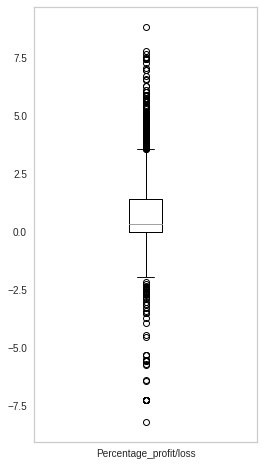

In [ ]:
# check outliers in user_age column use boxplot
adv_merge_reg.boxplot(column=['Percentage_profit/loss'], fontsize=10, rot=0, grid=False, figsize=(4,8))

In [ ]:
# Find Q1, Q3, IQR
Q1 = adv_merge_reg['Percentage_profit/loss'].quantile(0.25)
Q3 = adv_merge_reg['Percentage_profit/loss'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 1.431

IQR:
 1.431

Min:
 -2.1465

Max:
 3.5775


In [ ]:
# display data including outliers
low_out_profit = []
high_out_profit = []

for i in adv_merge_reg['Percentage_profit/loss']:
    if (i < boxplot_min):
        low_out_profit.append(i)
    if (i > boxplot_max):
        high_out_profit.append(i)

print('Low outlier : ', low_out_profit)
print('High outlier : ', high_out_profit)

Low outlier :  [-2.386, -2.5205046459031584, -2.8979999999999997, -2.4345454545454546, -2.637, -7.268484999999999, -5.31382, -7.268466666666666, -6.459781818181819, -4.4353288590604025, -5.703373333333333, -3.1078666666666668, -3.1488166666666664, -4.522282051282051, -2.873989010989011, -7.2684999999999995, -3.409869565217391, -5.56145, -7.268510080498005, -7.268482499999999, -3.73307, -5.313828, -7.268479999999999, -8.214599999999999, -3.934165853658537, -5.73451, -5.5467, -2.709170731707317, -6.4075999999999995, -7.268482, -7.2684999999999995, -2.815332651157737, -5.313818181818182, -3.5158571428571426, -3.50955, -5.59375600384246, -3.021122, -7.268479999999999, -3.3072, -2.5454, -5.5467, -5.54666, -5.5467, -2.1482, -2.7014, -3.5006700000000004, -2.3860360000000003, -2.68765, -2.68764, -2.3564305990246743, -2.4299999999999997, -2.2372727272727273, -2.6049243526331103, -2.5802, -2.646923076923077, -2.6470000000000002, -2.479238885595732, -2.480790939878373, -2.479759384285468]
High ou

we shouldn't remove the outlier, because it is a natural part of the population, the variation of the data is indeed large

# 11. Handle Correlated Features

In [ ]:
adv_merge_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flag_order_bond                   8277 non-null   int64         
 1   bond_units_ordered                8277 non-null   int64         
 2   registration_import_datetime      8277 non-null   datetime64[ns]
 3   user_gender                       8277 non-null   object        
 4   user_age                          8277 non-null   int64         
 5   user_occupation                   8277 non-null   object        
 6   user_income_range                 8277 non-null   object        
 7   referral_code_used                8277 non-null   object        
 8   user_income_source                8277 non-null   object        
 9   user_vintage_sept                 8277 non-null   int64         
 10  date                              8277 non-null 

In [ ]:
(r, p_value) = stats.pearsonr(adv_merge_reg['bond_units_ordered'],adv_merge_reg['Percentage_profit/loss'])
print('korelasi: ' , r)
print('p-value: ' , p_value)

korelasi:  0.10792475817716947
p-value:  7.12786618260542e-23


In [ ]:
(r, p_value) = stats.pearsonr(adv_merge_reg['bond_units_ordered'],adv_merge_reg['Saham_AUM'])
print('korelasi: ' , r)
print('p-value: ' , p_value)

korelasi:  0.14175247805291918
p-value:  2.0651224737314427e-38


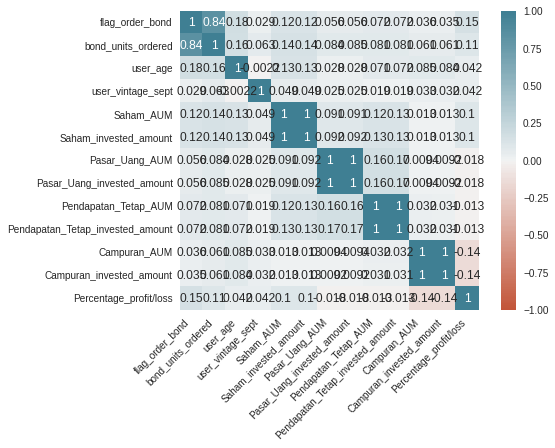

In [ ]:
# Correlation Matrix
corr = adv_merge_reg.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr

,flag_order_bond,bond_units_ordered,user_age,user_vintage_sept,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,Percentage_profit/loss
flag_order_bond,1.000000,0.835131,0.175464,0.028932,0.124360,0.124406,0.056015,0.056038,0.071696,0.071917,0.036095,0.035420,0.152774
bond_units_ordered,0.835131,1.000000,0.164726,0.062840,0.141752,0.141881,0.084497,0.084510,0.080983,0.081191,0.061469,0.060824,0.107925
user_age,0.175464,0.164726,1.000000,-0.002211,0.133293,0.133409,0.028388,0.028405,0.071485,0.071786,0.084827,0.084386,0.041795
user_vintage_sept,0.028932,0.062840,-0.002211,1.000000,0.049244,0.048890,0.024726,0.024689,0.019013,0.018972,0.032557,0.032455,0.041507
Saham_AUM,0.124360,0.141752,0.133293,0.049244,1.000000,0.999931,0.091256,0.091349,0.124449,0.125355,0.013343,0.012700,0.103930
Saham_invested_amount,0.124406,0.141881,0.133409,0.048890,0.999931,1.000000,0.091684,0.091779,0.125130,0.126038,0.013290,0.012648,0.102888
Pasar_Uang_AUM,0.056015,0.084497,0.028388,0.024726,0.091256,0.091684,1.000000,0.999999,0.164378,0.165260,0.009450,0.009217,-0.017589
Pasar_Uang_invested_amount,0.056038,0.084510,0.028405,0.024689,0.091349,0.091779,0.999999,1.000000,0.164569,0.165454,0.009432,0.009200,-0.017609
Pendapatan_Tetap_AUM,0.071696,0.080983,0.071485,0.019013,0.124449,0.125130,0.164378,0.164569,1.000000,0.999993,0.032019,0.030735,-0.013370
Pendapatan_Tetap_invested_amount,0.071917,0.081191,0.071786,0.018972,0.125355,0.126038,0.165260,0.165454,0.999993,1.000000,0.032059,0.030774,-0.013478


Variables that have a high correlation is flag_order_bond and bond_units_ordered; AUM and invested amount of each type of mutual funds

So we drop column bond_units_ordered, and invested amount of each type of mutual funds

In [ ]:
# Drop column
drop_column_corr = ['bond_units_ordered','Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']

adv_merge_reg.drop(drop_column_corr, axis=1, inplace=True)
adv_merge_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   flag_order_bond               8277 non-null   int64         
 1   registration_import_datetime  8277 non-null   datetime64[ns]
 2   user_gender                   8277 non-null   object        
 3   user_age                      8277 non-null   int64         
 4   user_occupation               8277 non-null   object        
 5   user_income_range             8277 non-null   object        
 6   referral_code_used            8277 non-null   object        
 7   user_income_source            8277 non-null   object        
 8   user_vintage_sept             8277 non-null   int64         
 9   date                          8277 non-null   datetime64[ns]
 10  Saham_AUM                     8277 non-null   float64       
 11  Pasar_Uang_AUM                

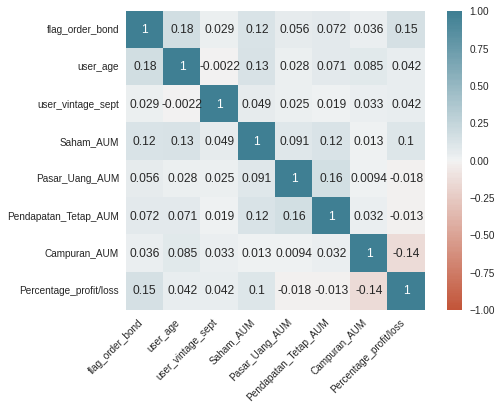

In [ ]:
# Correlation Matrix
corr = adv_merge_reg.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr

,flag_order_bond,user_age,user_vintage_sept,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Percentage_profit/loss
flag_order_bond,1.000000,0.175464,0.028932,0.124360,0.056015,0.071696,0.036095,0.152774
user_age,0.175464,1.000000,-0.002211,0.133293,0.028388,0.071485,0.084827,0.041795
user_vintage_sept,0.028932,-0.002211,1.000000,0.049244,0.024726,0.019013,0.032557,0.041507
Saham_AUM,0.124360,0.133293,0.049244,1.000000,0.091256,0.124449,0.013343,0.103930
Pasar_Uang_AUM,0.056015,0.028388,0.024726,0.091256,1.000000,0.164378,0.009450,-0.017589
Pendapatan_Tetap_AUM,0.071696,0.071485,0.019013,0.124449,0.164378,1.000000,0.032019,-0.013370
Campuran_AUM,0.036095,0.084827,0.032557,0.013343,0.009450,0.032019,1.000000,-0.141074
Percentage_profit/loss,0.152774,0.041795,0.041507,0.103930,-0.017589,-0.013370,-0.141074,1.000000


# 12. Regression Model

In [ ]:
model = LogisticRegression()

x = adv_merge_reg[['user_age','user_vintage_sept','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','Percentage_profit/loss']]
y = adv_merge_reg[['flag_order_bond']]

model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([-5.59860385e-12])

In [ ]:
model.coef_

array([[-1.23438239e-10, -2.68630277e-12,  1.04426952e-07,
         1.11870253e-07,  1.82218462e-07,  2.18291994e-08,
         2.42946769e-13]])

In [ ]:
# calculate the probability 
model.predict_proba(x)

array([[0.44594693, 0.55405307],
       [0.36613645, 0.63386355],
       [0.49689309, 0.50310691],
       ...,
       [0.49636191, 0.50363809],
       [0.49954505, 0.50045495],
       [0.4997203 , 0.5002797 ]])

In [ ]:
# Predict 
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1])